In [1]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline

In [3]:
plt.rcParams['pdf.fonttype'] = 42

In [4]:
from cycler import cycler

In [5]:
from matplotlib.ticker import FuncFormatter

In [6]:
import matplotlib.font_manager
from IPython.core.display import HTML

def make_html(fontname):
    return "<p>{font}: <span style='font-family:{font}; font-size: 24px;'>{font}</p>".format(font=fontname)

code = "\n".join([make_html(font) for font in sorted(set([f.name for f in matplotlib.font_manager.fontManager.ttflist]))])

HTML("<div style='column-count: 2;'>{}</div>".format(code))

## Read and discover the original file

In [7]:
df = pd.read_csv('output_fixed_web_sentiment3.csv')

C:\Users\kellykiki\AppData\Local\Programs\Python\Python36\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (18) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [8]:
df.head(1)

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Unnamed: 0.1.1.1,channel,item_type,id,createdAt,impact,info,...,sentiment,query,[1],[2],norm_text,norm_snippet,predicted_tag,predicted_spam,tag,norm_tag
0,0,0,0,0,instagram,media,795_instagram_media_96bf0088e597c535289704a859...,2017-09-03 01:29:21,NaN,nikos_votzakis,...,neutral,tsigara,NaN,NaN,δεν ξερω πωσ σε λενε δεν ξερω το προσωπο σου ε...,δεν ξερω πωσ σε λενε δεν ξερω το προσωπο σου ε...,[1] Συνήθειες,ham,[1] Consumer Searches,[1]συνηθειες


In [9]:
df.dtypes

Unnamed: 0               int64
Unnamed: 0.1             int64
Unnamed: 0.1.1           int64
Unnamed: 0.1.1.1         int64
channel                 object
item_type               object
id                      object
createdAt               object
impact                 float64
info                    object
text                    object
snippet                 object
url                     object
manual_sentiment        object
predicted_sentiment     object
sentiment               object
query                   object
[1]                     object
[2]                     object
norm_text               object
norm_snippet            object
predicted_tag           object
predicted_spam          object
tag                     object
norm_tag                object
dtype: object

In [10]:
df.shape

(622941, 25)

In [11]:
df.tag.value_counts()

[1] ignore                         181372
[1] Χιούμορ/τρολ/άλλες αναφορές    114764
[1] Consumer Searches              104637
[1] Ασθένειες & Υγεία               54484
[1] Προϊόντα καπνού                 46901
[1] Διακοπή                         37832
[1] Νέα για την αγορά               32583
[1] Προϊόντα μειωμένου κινδύνου     29898
[1] Μαριχουάνα                      11655
[1] Περιβάλλον                       7458
[1] Απαγόρευση                       1357
Name: tag, dtype: int64

In [12]:
df.tag.value_counts().sum()

622941

In [13]:
df.predicted_tag.value_counts().sum()

622941

In [14]:
df.sentiment.value_counts().sum()

622941

In [15]:
df.norm_tag.value_counts().sum()

622941

In [16]:
df.norm_tag.value_counts

<bound method IndexOpsMixin.value_counts of 0                          [1]συνηθειες
1                          [1]συνηθειες
2                     [1]προϊόντακαπνού
3         [1]χιούμορ/τρολ/άλλεςαναφορές
4         [1]χιούμορ/τρολ/άλλεςαναφορές
5                          [1]συνηθειες
6                     [1]προϊόντακαπνού
7                     [1]προϊόντακαπνού
8                             [1]ignore
9                     [1]προϊόντακαπνού
10                         [1]συνηθειες
11                         [1]συνηθειες
12        [1]χιούμορ/τρολ/άλλεςαναφορές
13        [1]χιούμορ/τρολ/άλλεςαναφορές
14                    [1]προϊόντακαπνού
15        [1]χιούμορ/τρολ/άλλεςαναφορές
16        [1]χιούμορ/τρολ/άλλεςαναφορές
17        [1]χιούμορ/τρολ/άλλεςαναφορές
18                    [1]προϊόντακαπνού
19                         [1]συνηθειες
20        [1]χιούμορ/τρολ/άλλεςαναφορές
21                            [1]ignore
22                            [1]ignore
23                            [1]ign

## Create new df w/out ignore and spam

In [17]:
df1 = df[(df.manual_sentiment!='ignore')&(df.predicted_spam=='ham')].copy()

In [18]:
df1.head(1)

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Unnamed: 0.1.1.1,channel,item_type,id,createdAt,impact,info,...,sentiment,query,[1],[2],norm_text,norm_snippet,predicted_tag,predicted_spam,tag,norm_tag
0,0,0,0,0,instagram,media,795_instagram_media_96bf0088e597c535289704a859...,2017-09-03 01:29:21,NaN,nikos_votzakis,...,neutral,tsigara,NaN,NaN,δεν ξερω πωσ σε λενε δεν ξερω το προσωπο σου ε...,δεν ξερω πωσ σε λενε δεν ξερω το προσωπο σου ε...,[1] Συνήθειες,ham,[1] Consumer Searches,[1]συνηθειες


In [19]:
df1.dtypes

Unnamed: 0               int64
Unnamed: 0.1             int64
Unnamed: 0.1.1           int64
Unnamed: 0.1.1.1         int64
channel                 object
item_type               object
id                      object
createdAt               object
impact                 float64
info                    object
text                    object
snippet                 object
url                     object
manual_sentiment        object
predicted_sentiment     object
sentiment               object
query                   object
[1]                     object
[2]                     object
norm_text               object
norm_snippet            object
predicted_tag           object
predicted_spam          object
tag                     object
norm_tag                object
dtype: object

In [20]:
df1.shape

(441670, 25)

In [21]:
df1.tag.value_counts()

[1] Χιούμορ/τρολ/άλλες αναφορές    114764
[1] Consumer Searches              104637
[1] Ασθένειες & Υγεία               54484
[1] Προϊόντα καπνού                 46901
[1] Διακοπή                         37832
[1] Νέα για την αγορά               32583
[1] Προϊόντα μειωμένου κινδύνου     29898
[1] Μαριχουάνα                      11655
[1] Περιβάλλον                       7458
[1] Απαγόρευση                       1357
[1] ignore                            101
Name: tag, dtype: int64

In [22]:
df1.tag.value_counts().sum()

441670

In [23]:
df1.predicted_tag.value_counts().sum()

441670

In [24]:
df1.sentiment.value_counts().sum()

441670

In [25]:
df1.predicted_tag.value_counts()

[1] Χιούμορ/τρολ/άλλες αναφορές                         122458
[1] Συνήθειες                                            84993
[1] Προϊόντα καπνού                                      49234
[1] Ασθένειες & Υγεία                                    47473
[1] Προϊόντα μειωμένου κινδύνου                          34064
[1] Νέα για την αγορά                                    31085
[1] Διακοπή καπνίσματος                                  30362
[1] Απαγόρευση καπνίσματος                               18607
[1] Μαριχουάνα                                            9671
[1] Περιβάλλον                                            7045
[1] Παρενέργειες/ Αλλαγές από τη διακοπή καπνίσματος      4829
[1] Απαγόρευση                                            1285
[1] Απαγόρευση σε εσωτερικούς χώρους                       377
[1] Consumer Searches                                      110
[1] Ασθένειες και Υγεία                                     58
[1] Διακοπή                                            

In [26]:
df1.norm_tag.value_counts()

[1]χιούμορ/τρολ/άλλεςαναφορές                     114764
[1]συνηθειες                                       83047
[1]ασθένειες&υγεία                                 54484
[1]προϊόντακαπνού                                  46901
[1]νέαγιατηναγορά                                  32583
[1]διακοπηκαπνίσματος                              31821
[1]προϊόνταμειωμένουκινδύνου                       29898
[1]απαγόρευσηκαπνίσματος                           20991
[1]μαριχουάνα                                      11655
[1]περιβάλλον                                       7458
[1]παρενέργειες/αλλαγέςαπότηδιακοπηκαπνίσματος      5973
[1]απαγόρευση                                       1357
[1]απαγόρευσησεεσωτερικούςχώρους                     433
[1]consumersearches                                  166
[1]ignore                                            101
[1]διακοπη                                            38
Name: norm_tag, dtype: int64

In [27]:
df1.norm_tag.value_counts().sum()

441670

In [28]:
df1.sentiment.value_counts()

neutral     379661
negative     52895
positive      9114
Name: sentiment, dtype: int64

## Cleaning & fixing

In [29]:
df1['date'] = df1['createdAt'].apply(lambda x: re.match("^(\d\d\d\d-\d\d-\d\d)",x).group(1))

In [30]:
df1.head(1)

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Unnamed: 0.1.1.1,channel,item_type,id,createdAt,impact,info,...,query,[1],[2],norm_text,norm_snippet,predicted_tag,predicted_spam,tag,norm_tag,date
0,0,0,0,0,instagram,media,795_instagram_media_96bf0088e597c535289704a859...,2017-09-03 01:29:21,NaN,nikos_votzakis,...,tsigara,NaN,NaN,δεν ξερω πωσ σε λενε δεν ξερω το προσωπο σου ε...,δεν ξερω πωσ σε λενε δεν ξερω το προσωπο σου ε...,[1] Συνήθειες,ham,[1] Consumer Searches,[1]συνηθειες,2017-09-03


In [31]:
df1['month'] = df1['createdAt'].apply(lambda x: re.match("^(\d\d\d\d-\d\d)-\d\d",x).group(1))

In [32]:
df1.head(2)

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Unnamed: 0.1.1.1,channel,item_type,id,createdAt,impact,info,...,[1],[2],norm_text,norm_snippet,predicted_tag,predicted_spam,tag,norm_tag,date,month
0,0,0,0,0,instagram,media,795_instagram_media_96bf0088e597c535289704a859...,2017-09-03 01:29:21,NaN,nikos_votzakis,...,NaN,NaN,δεν ξερω πωσ σε λενε δεν ξερω το προσωπο σου ε...,δεν ξερω πωσ σε λενε δεν ξερω το προσωπο σου ε...,[1] Συνήθειες,ham,[1] Consumer Searches,[1]συνηθειες,2017-09-03,2017-09
1,1,1,1,1,instagram,media,795_instagram_media_f832a68c8eaa9b22e44db1c0ca...,2017-09-17 12:36:31,NaN,kostas_kalio,...,NaN,NaN,δωσ μου ποτα τσιγαρα βαρια μεχρι να μην την σκ...,δωσ μου ποτα τσιγαρα βαρια μεχρι να μην την σκ...,[1] Συνήθειες,ham,[1] Consumer Searches,[1]συνηθειες,2017-09-17,2017-09


In [33]:
df1['topic'] = df1['tag']

In [34]:
df1.head(1)

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Unnamed: 0.1.1.1,channel,item_type,id,createdAt,impact,info,...,[2],norm_text,norm_snippet,predicted_tag,predicted_spam,tag,norm_tag,date,month,topic
0,0,0,0,0,instagram,media,795_instagram_media_96bf0088e597c535289704a859...,2017-09-03 01:29:21,NaN,nikos_votzakis,...,NaN,δεν ξερω πωσ σε λενε δεν ξερω το προσωπο σου ε...,δεν ξερω πωσ σε λενε δεν ξερω το προσωπο σου ε...,[1] Συνήθειες,ham,[1] Consumer Searches,[1]συνηθειες,2017-09-03,2017-09,[1] Consumer Searches


In [35]:
df1.topic.value_counts()

[1] Χιούμορ/τρολ/άλλες αναφορές    114764
[1] Consumer Searches              104637
[1] Ασθένειες & Υγεία               54484
[1] Προϊόντα καπνού                 46901
[1] Διακοπή                         37832
[1] Νέα για την αγορά               32583
[1] Προϊόντα μειωμένου κινδύνου     29898
[1] Μαριχουάνα                      11655
[1] Περιβάλλον                       7458
[1] Απαγόρευση                       1357
[1] ignore                            101
Name: topic, dtype: int64

In [36]:
df1['topic']= df1['topic'].astype(str)

In [37]:
df1.dtypes

Unnamed: 0               int64
Unnamed: 0.1             int64
Unnamed: 0.1.1           int64
Unnamed: 0.1.1.1         int64
channel                 object
item_type               object
id                      object
createdAt               object
impact                 float64
info                    object
text                    object
snippet                 object
url                     object
manual_sentiment        object
predicted_sentiment     object
sentiment               object
query                   object
[1]                     object
[2]                     object
norm_text               object
norm_snippet            object
predicted_tag           object
predicted_spam          object
tag                     object
norm_tag                object
date                    object
month                   object
topic                   object
dtype: object

In [38]:
df1['topic'] = df1['topic'].replace({'[1] Consumer Searches':'Consumer Searches',
                  '[1] Χιούμορ/τρολ/άλλες αναφορές': "Humor/troll/other mentions",
                  '[1] Ασθένειες & Υγεία':'Deseases & Health',
                  '[1] Προϊόντα καπνού':'Tobacco Products',
                  '[1] Διακοπή': 'Quitting',
                  '[1] Νέα για την αγορά': 'Market News',
                   '[1] Προϊόντα μειωμένου κινδύνου':'Reduced Risk Products',
                   '[1] Μαριχουάνα':'Marijuana',
                   '[1] Περιβάλλον':'Environment',
                    '[1] Απαγόρευση': 'Consumer Searches'})

In [39]:
df1.topic.value_counts()

Humor/troll/other mentions    114764
Consumer Searches             105994
Deseases & Health              54484
Tobacco Products               46901
Quitting                       37832
Market News                    32583
Reduced Risk Products          29898
Marijuana                      11655
Environment                     7458
[1] ignore                       101
Name: topic, dtype: int64

In [40]:
df2 = df1[(df1.topic !='[1] ignore')].copy()

In [41]:
df2.topic.value_counts()

Humor/troll/other mentions    114764
Consumer Searches             105994
Deseases & Health              54484
Tobacco Products               46901
Quitting                       37832
Market News                    32583
Reduced Risk Products          29898
Marijuana                      11655
Environment                     7458
Name: topic, dtype: int64

In [42]:
df3 = df2.copy()

In [43]:
df3.channel.value_counts()

twitter      318581
facebook      65693
news          40412
instagram     12377
blogs          2182
youtube        1811
forums          513
Name: channel, dtype: int64

In [44]:
df3['channel'] = df3['channel'].replace({'twitter':'Twitter',
                  'facebook': "Facebook",
                  'news':'News',
                  'instagram':'Instagram',
                  'blogs': 'Blogs',
                  'youtube': 'YouTube',
                  'forums': 'Forums'})

In [45]:
df3.channel.value_counts()

Twitter      318581
Facebook      65693
News          40412
Instagram     12377
Blogs          2182
YouTube        1811
Forums          513
Name: channel, dtype: int64

## Analysis & Graphs

In [46]:
## reproducing buzz trendlines after droping "ignore"

In [56]:
df2['channel'] = df2['channel'].apply(lambda x: 'web' if x in ['news', 'blogs','forums'] else x)

In [57]:
value_counts = df2.groupby(['date','channel'])['id'].agg('count')
value_counts.sort_index(inplace=True)
value_counts = value_counts.reset_index()
value_counts = value_counts.rename(columns={'id':'count'})

In [58]:
value_counts.head()

,date,channel,count
0,2017-09-01,facebook,156
1,2017-09-01,instagram,37
2,2017-09-01,twitter,691
3,2017-09-01,web,25
4,2017-09-01,youtube,2


In [88]:
value_counts3 = df2.groupby('date')['id'].agg('count')
value_counts3.sort_index(inplace=True)
value_counts3 = value_counts3.reset_index()
value_counts3 = value_counts3.rename(columns={'id':'count'})

In [89]:
value_counts3

,date,count
0,2017-09-01,911
1,2017-09-02,1144
2,2017-09-03,1286
3,2017-09-04,1366
4,2017-09-05,1227
5,2017-09-06,1448
6,2017-09-07,1363
7,2017-09-08,994
8,2017-09-09,1074
9,2017-09-10,1339


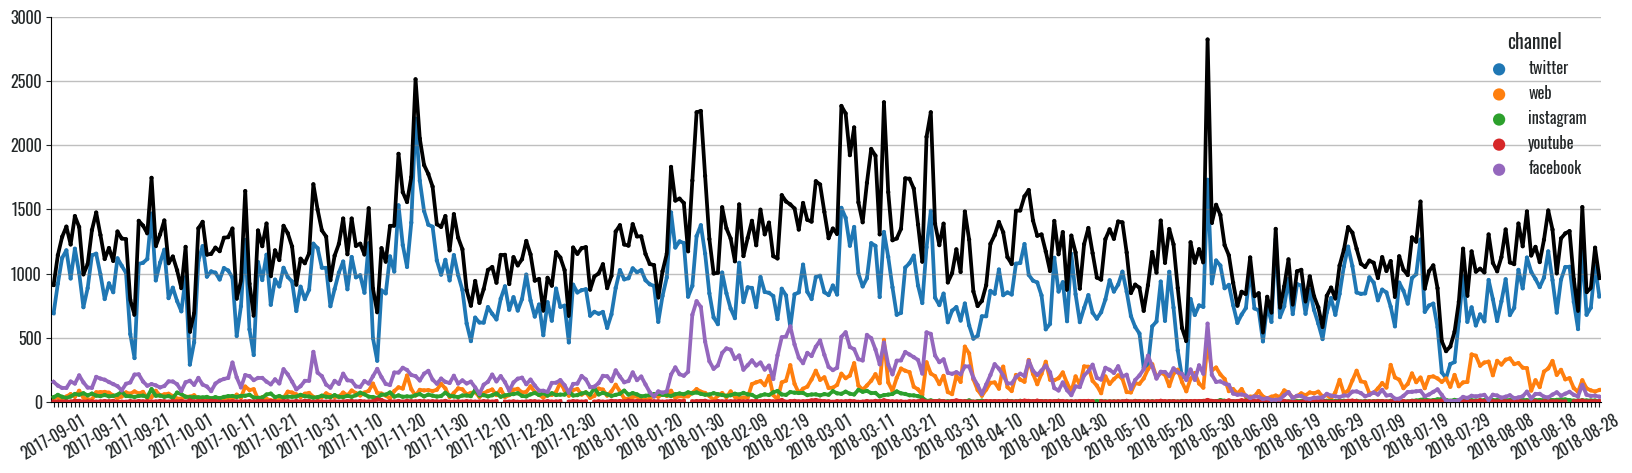

In [221]:
# value_counts = df2.groupby(['date','channel'])['id'].agg('count')
# value_counts.sort_index(inplace=True)
# value_counts = value_counts.reset_index()
# value_counts = value_counts.rename(columns={'id':'count'})
plt.figure(figsize=(20,5))

plt.rcParams.update({
    'axes.facecolor': 'white',
    'savefig.facecolor': 'white',
    'figure.facecolor': 'white',
    'axes.spines.left': True,
    'axes.spines.bottom': True,
    'axes.spines.top': False,
    'axes.spines.right': False,
    #'axes.grid':True
#   'grid.color':'#ffffff',
#   'grid.linewidth':2,
#    'grid.alpha':0.6,
    'xtick.top': False,
    'xtick.bottom': True,
    'xtick.color': '#232728',
    'ytick.color':'#232728',
    #'ytick.bottom': True,
    #'ytick.color': 'black'
    #'xtick.major.size': 7,
    #'xtick.major.width': 3,
    #'xtick.major.pad': 0,
    #'xtick.direction': 'in',
    'xtick.labelsize': 'small',
    'ytick.labelsize': 'small',
    'legend.loc': 'best',
     'legend.frameon': False,
     'legend.fontsize': 'small',
#      'legend.handlelength': 0.5,
#      'legend.handleheight': 0.5,
    #'legend.columnspacing': 2.0,
    'font.family': 'Oswald',
    'font.size':14,
    'text.color':'#232728',
     })

# ax = sns.pointplot(data=value_counts3, x='date',  y='count',color='black')
ax = sns.pointplot(data=value_counts, x='date',  y='count', hue='channel',hue_order=['twitter', 'web','instagram','youtube','facebook'],pallete=['#61D3EE','#575757','#B5568A','#FF0000','#0070C0'])
ax = sns.pointplot(data=value_counts3, x='date',  y='count',color='black',ax=ax)
plt.setp(ax.collections, sizes=[1])
labels = ax.get_xticklabels() # get x labels
for i,l in enumerate(labels):
    if i % 10 != 0: labels[i] = '' # skip even labels   

ax.set_xticklabels(labels, rotation=30) # set new labels
ax.xaxis.label.set_visible(False)
ax.yaxis.label.set_visible(False)
ax.tick_params(left=True)
ax.set_ylim(0,3000)

plt.savefig("estimated_buzz_daily_UPD.pdf")
plt.show()

In [50]:
plt.rcdefaults()
plt.rcParams.update({
    'pdf.fonttype': 42,
    'ps.fonttype': 42,
})

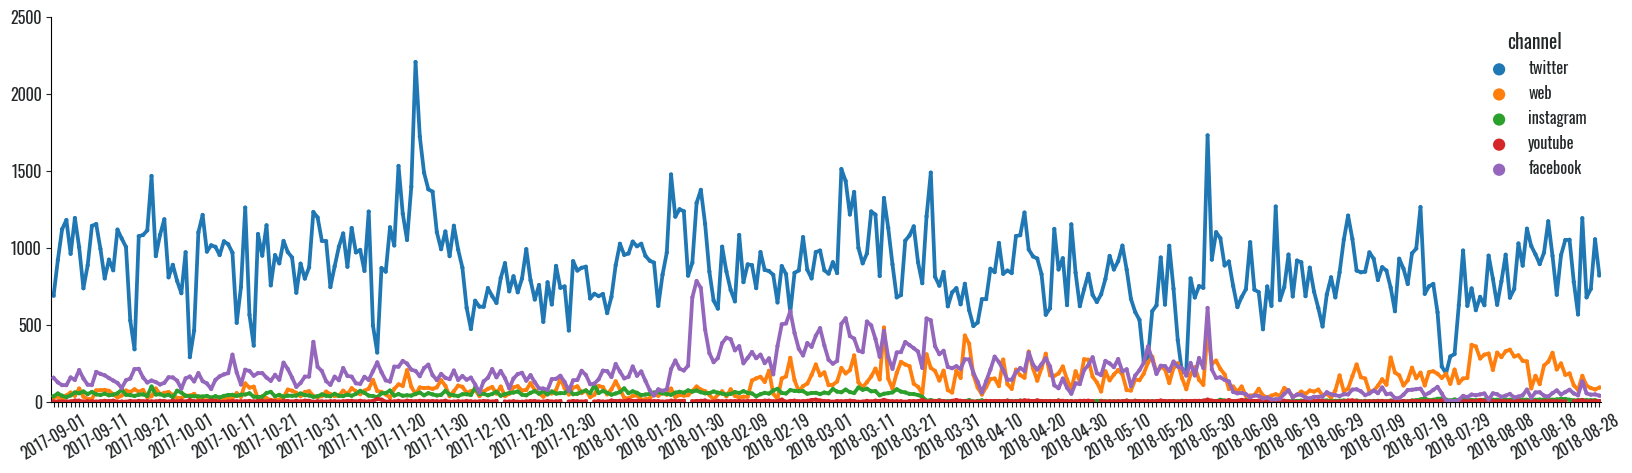

In [51]:
value_counts = df2.groupby(['date','channel'])['id'].agg('count')
value_counts.sort_index(inplace=True)
value_counts = value_counts.reset_index()
value_counts = value_counts.rename(columns={'id':'count'})
plt.figure(figsize=(20,5))

plt.rcParams.update({
    'axes.facecolor': 'white',
    'savefig.facecolor': 'white',
    'figure.facecolor': 'white',
    'axes.spines.left': True,
    'axes.spines.bottom': True,
    'axes.spines.top': False,
    'axes.spines.right': False,
    #'axes.grid':True
#   'grid.color':'#ffffff',
#   'grid.linewidth':2,
#    'grid.alpha':0.6,
    'xtick.top': False,
    'xtick.bottom': True,
    'xtick.color': '#232728',
    'ytick.color':'#232728',
    #'ytick.bottom': True,
    #'ytick.color': 'black'
    #'xtick.major.size': 7,
    #'xtick.major.width': 3,
    #'xtick.major.pad': 0,
    #'xtick.direction': 'in',
    'xtick.labelsize': 'small',
    'ytick.labelsize': 'small',
    'legend.loc': 'best',
     'legend.frameon': False,
     'legend.fontsize': 'small',
#      'legend.handlelength': 0.5,
#      'legend.handleheight': 0.5,
    #'legend.columnspacing': 2.0,
    'font.family': 'Oswald',
    'font.size':14,
    'text.color':'#232728',
     })

ax = sns.pointplot(data=value_counts, x='date',  y='count', hue='channel',hue_order=['twitter', 'web','instagram','youtube','facebook'],pallete=['#61D3EE','#575757','#B5568A','#FF0000','#0070C0'])
plt.setp(ax.collections, sizes=[1])
labels = ax.get_xticklabels() # get x labels
for i,l in enumerate(labels):
    if i % 10 != 0: labels[i] = '' # skip even labels   

ax.set_xticklabels(labels, rotation=30) # set new labels
ax.xaxis.label.set_visible(False)
ax.yaxis.label.set_visible(False)
ax.tick_params(left=True)
ax.set_ylim(0,2500)

plt.savefig("estimated_buzz_daily.pdf")
plt.show()

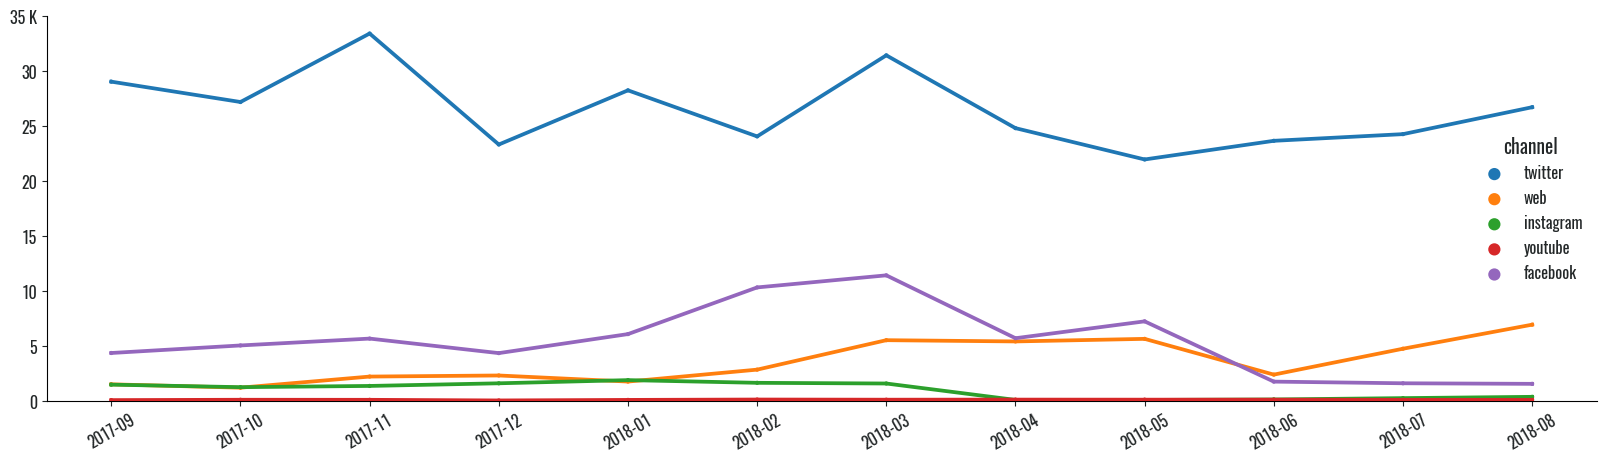

In [52]:
value_counts2 = df2.groupby(['month','channel'])['id'].agg('count')
value_counts2.sort_index(inplace=True)
value_counts2 = value_counts2.reset_index()
value_counts2 = value_counts2.rename(columns={'id':'count'})
plt.figure(figsize=(20,5))

def with_words(value, pos):
    thousands = int(value / 1000)
    if thousands == 35:
        return "{} K".format(thousands)
    else: 
        return "{}".format(thousands)
    
formatter = FuncFormatter(with_words)


ax = sns.pointplot(data=value_counts2, x='month',  y='count', hue='channel',hue_order=['twitter', 'web','instagram','youtube','facebook'],pallete=['#61D3EE','#575757','#B5568A','#FF0000','#0070C0'])
plt.setp(ax.collections, sizes=[1])
labels = ax.get_xticklabels() # get x labels


ax.yaxis.set_major_formatter(formatter)
ax.set_xticklabels(labels, rotation=30) # set new labels
ax.xaxis.label.set_visible(False)
ax.yaxis.label.set_visible(False)
ax.tick_params(left=True)
ax.set_ylim(0,35000)

plt.savefig("estimated_buzz_month.pdf")
plt.show()

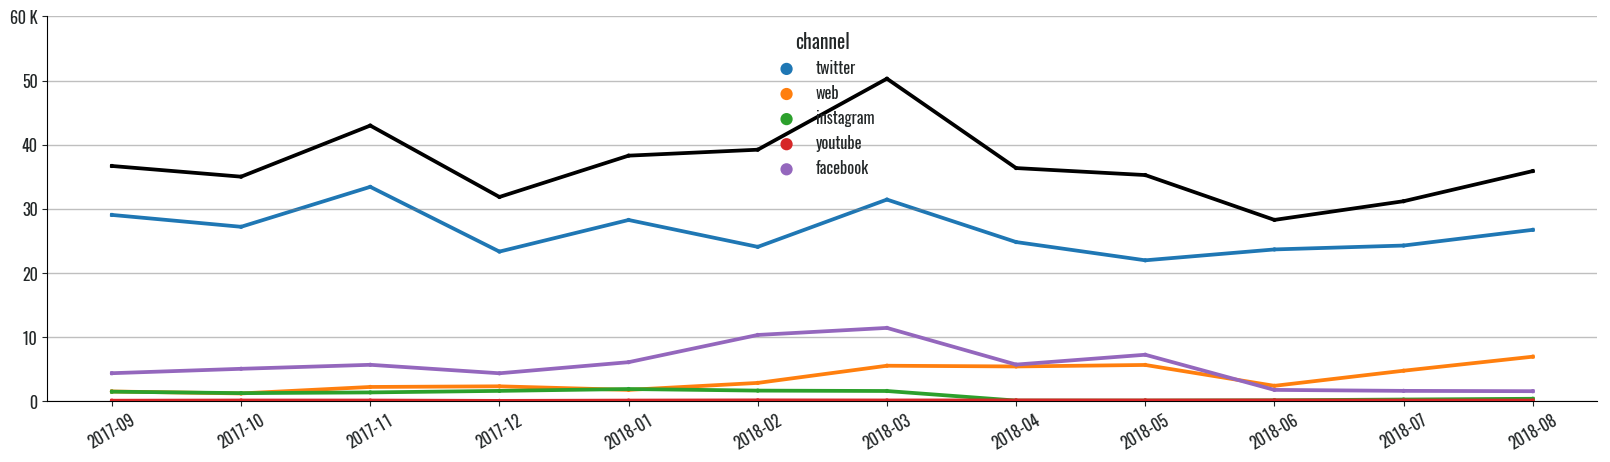

In [222]:
value_counts4 = df2.groupby('month')['id'].agg('count')
value_counts4.sort_index(inplace=True)
value_counts4 = value_counts4.reset_index()
value_counts4 = value_counts4.rename(columns={'id':'count'})

# value_counts2 = df2.groupby(['month','channel'])['id'].agg('count')
# value_counts2.sort_index(inplace=True)
# value_counts2 = value_counts2.reset_index()
# value_counts2 = value_counts2.rename(columns={'id':'count'})
plt.figure(figsize=(20,5))

def with_words(value, pos):
    thousands = int(value / 1000)
    if thousands == 60:
        return "{} K".format(thousands)
    else: 
        return "{}".format(thousands)
    
formatter = FuncFormatter(with_words)


ax = sns.pointplot(data=value_counts2, x='month',  y='count', hue='channel',hue_order=['twitter', 'web','instagram','youtube','facebook'],pallete=['#61D3EE','#575757','#B5568A','#FF0000','#0070C0'])
ax = sns.pointplot(data=value_counts4, x='month',  y='count',color='black',ax=ax)
plt.setp(ax.collections, sizes=[1])
labels = ax.get_xticklabels() # get x labels


ax.yaxis.set_major_formatter(formatter)
ax.set_xticklabels(labels, rotation=30) # set new labels
ax.xaxis.label.set_visible(False)
ax.yaxis.label.set_visible(False)
ax.tick_params(left=True)
ax.set_ylim(0,60000)

plt.savefig("estimated_buzz_month_UPD.pdf")
plt.show()

In [53]:
df2.topic.value_counts()

Humor/troll/other mentions    114764
Consumer Searches             105994
Deseases & Health              54484
Tobacco Products               46901
Quitting                       37832
Market News                    32583
Reduced Risk Products          29898
Marijuana                      11655
Environment                     7458
Name: topic, dtype: int64

0
1
2
3
4
5
6
7
8


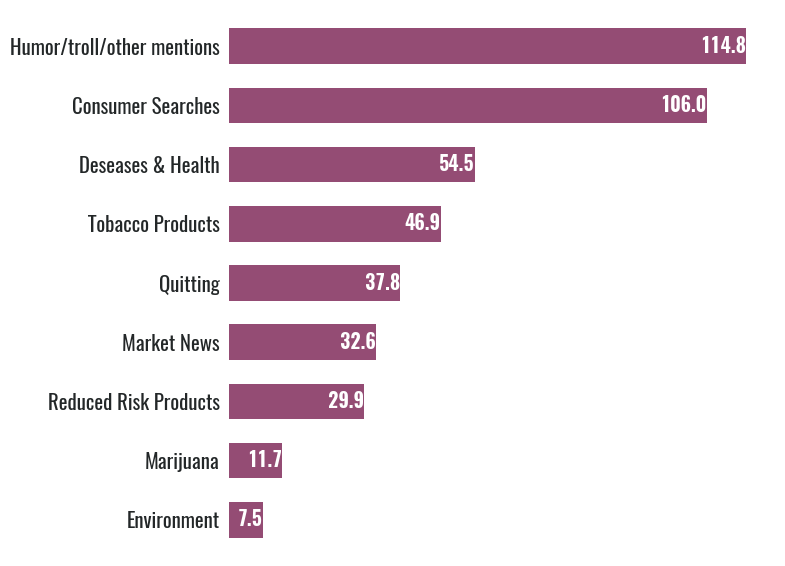

In [54]:
plt.rcParams.update({
    'axes.facecolor': 'white',
    'savefig.facecolor': 'white',
    'figure.facecolor': 'white',
    'axes.spines.left': False,
    'axes.spines.bottom': False,
    'axes.spines.top': False,
    'axes.spines.right': False,
    #'axes.grid':True
#   'grid.color':'#ffffff',
#   'grid.linewidth':2,
#    'grid.alpha':0.6,
    'xtick.top': False,
    'xtick.bottom': False,
    'xtick.color': '#232728',
    'ytick.color':'#232728',
    #'ytick.bottom': True,
    #'ytick.color': 'black'
    #'xtick.major.size': 7,
    #'xtick.major.width': 3,
    #'xtick.major.pad': 0,
    #'xtick.direction': 'in',
    'xtick.labelsize': 'small',
    'ytick.labelsize': 'small',
    'legend.loc': 'best',
     'legend.frameon': False,
     'legend.fontsize': 'small',
#      'legend.handlelength': 0.5,
#      'legend.handleheight': 0.5,
    #'legend.columnspacing': 2.0,
    'font.family': 'Oswald',
    'font.size':18,
    'text.color':'#232728',
     })


ax = df2.topic.value_counts().sort_values(ascending=True).plot(kind='barh', color='#944C74',figsize=(7,7), width=0.6)

ax.xaxis.label.set_visible(False)
ax.yaxis.label.set_visible(False)
ax.tick_params(left=False)
ax.tick_params(bottom=False)

ax.set_xticklabels([])

for i, bar in enumerate(ax.patches):
    #print(bar.get_width())
    print(i)
    value= int(round(bar.get_width()))
    x_pos = bar.get_width() - 0.7
    y_pos = i 
    ax.text(x_pos,y_pos,round(value/1000,1),va='center',ha='right',color='white',fontweight='bold',fontsize=14)

plt.savefig("topics_buzz_n.pdf")
#plt.savefig("topics_buzz_n.png")
plt.show()

In [55]:
round(df2.topic.value_counts(normalize=True)*100,1)

Humor/troll/other mentions    26.0
Consumer Searches             24.0
Deseases & Health             12.3
Tobacco Products              10.6
Quitting                       8.6
Market News                    7.4
Reduced Risk Products          6.8
Marijuana                      2.6
Environment                    1.7
Name: topic, dtype: float64

0
1
2
3
4
5
6
7
8


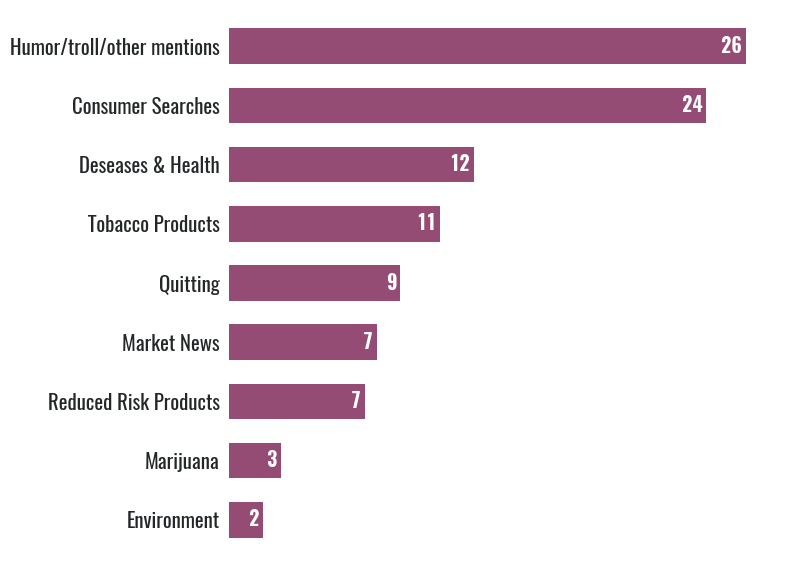

In [56]:
plt.rcParams.update({
    'axes.facecolor': 'white',
    'savefig.facecolor': 'white',
    'figure.facecolor': 'white',
    'axes.spines.left': False,
    'axes.spines.bottom': False,
    'axes.spines.top': False,
    'axes.spines.right': False,
    #'axes.grid':True
#   'grid.color':'#ffffff',
#   'grid.linewidth':2,
#    'grid.alpha':0.6,
    'xtick.top': False,
    'xtick.bottom': False,
    'xtick.color': '#232728',
    'ytick.color':'#232728',
    #'ytick.bottom': True,
    #'ytick.color': 'black'
    #'xtick.major.size': 7,
    #'xtick.major.width': 3,
    #'xtick.major.pad': 0,
    #'xtick.direction': 'in',
    'xtick.labelsize': 'small',
    'ytick.labelsize': 'small',
    'legend.loc': 'best',
     'legend.frameon': False,
     'legend.fontsize': 'small',
#      'legend.handlelength': 0.5,
#      'legend.handleheight': 0.5,
    #'legend.columnspacing': 2.0,
    'font.family': 'Oswald',
    'font.size':18,
    'text.color':'#232728',
     })

ax = round(df2.topic.value_counts(normalize=True)*100,1).sort_values(ascending=True).plot(kind='barh',color='#944C74',figsize=(7,7), width=0.6)

ax.xaxis.label.set_visible(False)
ax.yaxis.label.set_visible(False)
ax.tick_params(left=False)
ax.tick_params(bottom=False)
#ax.set_xlim(0,5000)
ax.set_xticklabels([])

for i, bar in enumerate(ax.patches):
    #print(bar.get_width())
    print(i)
    value= int(round(bar.get_width()))
    x_pos = bar.get_width() - 0.2
    y_pos = i 
    ax.text(x_pos,y_pos,value,va='center',ha='right',color='white',fontweight='bold',fontsize=14)

plt.savefig("topics_buzz_pct.pdf")
#plt.savefig("topics_buzz_pct.png")
plt.show()

In [57]:
df4 = df3[['topic','channel']].copy()
df4.head()

,topic,channel
0,Consumer Searches,Instagram
1,Consumer Searches,Instagram
2,Tobacco Products,Instagram
3,Humor/troll/other mentions,Instagram
4,Humor/troll/other mentions,Instagram


In [107]:
daily = df3[['date','topic','channel']].copy()
daily.head()

,date,topic,channel
0,2017-09-03,Consumer Searches,Instagram
1,2017-09-17,Consumer Searches,Instagram
2,2017-09-01,Tobacco Products,Instagram
3,2017-09-02,Humor/troll/other mentions,Instagram
4,2017-09-22,Humor/troll/other mentions,Instagram


In [109]:
monthly = df3[['month','topic','channel']].copy()
monthly.head()

,month,topic,channel
0,2017-09,Consumer Searches,Instagram
1,2017-09,Consumer Searches,Instagram
2,2017-09,Tobacco Products,Instagram
3,2017-09,Humor/troll/other mentions,Instagram
4,2017-09,Humor/troll/other mentions,Instagram


In [58]:
df5 = df4.groupby('topic').channel.value_counts().unstack().reset_index().fillna(0)

In [59]:
df5

channel,topic,Blogs,Facebook,Forums,Instagram,News,Twitter,YouTube
0,Consumer Searches,156.0,11734.0,45.0,1967.0,2942.0,88917.0,233.0
1,Deseases & Health,1199.0,8786.0,101.0,775.0,15894.0,27634.0,95.0
2,Environment,232.0,499.0,0.0,20.0,4527.0,2171.0,9.0
3,Humor/troll/other mentions,80.0,11473.0,8.0,2206.0,1184.0,99286.0,527.0
4,Marijuana,34.0,1874.0,0.0,153.0,636.0,8902.0,56.0
5,Market News,362.0,4572.0,14.0,30.0,13082.0,14497.0,26.0
6,Quitting,24.0,4693.0,8.0,553.0,562.0,31873.0,119.0
7,Reduced Risk Products,30.0,9847.0,246.0,1178.0,553.0,17443.0,601.0
8,Tobacco Products,65.0,12215.0,91.0,5495.0,1032.0,27858.0,145.0


In [60]:
df5['total'] = df5.sum(axis=1)
df5

channel,topic,Blogs,Facebook,Forums,Instagram,News,Twitter,YouTube,total
0,Consumer Searches,156.0,11734.0,45.0,1967.0,2942.0,88917.0,233.0,105994.0
1,Deseases & Health,1199.0,8786.0,101.0,775.0,15894.0,27634.0,95.0,54484.0
2,Environment,232.0,499.0,0.0,20.0,4527.0,2171.0,9.0,7458.0
3,Humor/troll/other mentions,80.0,11473.0,8.0,2206.0,1184.0,99286.0,527.0,114764.0
4,Marijuana,34.0,1874.0,0.0,153.0,636.0,8902.0,56.0,11655.0
5,Market News,362.0,4572.0,14.0,30.0,13082.0,14497.0,26.0,32583.0
6,Quitting,24.0,4693.0,8.0,553.0,562.0,31873.0,119.0,37832.0
7,Reduced Risk Products,30.0,9847.0,246.0,1178.0,553.0,17443.0,601.0,29898.0
8,Tobacco Products,65.0,12215.0,91.0,5495.0,1032.0,27858.0,145.0,46901.0


In [61]:
df5.sort_values(by='total',inplace=True)

In [62]:
df5

channel,topic,Blogs,Facebook,Forums,Instagram,News,Twitter,YouTube,total
2,Environment,232.0,499.0,0.0,20.0,4527.0,2171.0,9.0,7458.0
4,Marijuana,34.0,1874.0,0.0,153.0,636.0,8902.0,56.0,11655.0
7,Reduced Risk Products,30.0,9847.0,246.0,1178.0,553.0,17443.0,601.0,29898.0
5,Market News,362.0,4572.0,14.0,30.0,13082.0,14497.0,26.0,32583.0
6,Quitting,24.0,4693.0,8.0,553.0,562.0,31873.0,119.0,37832.0
8,Tobacco Products,65.0,12215.0,91.0,5495.0,1032.0,27858.0,145.0,46901.0
1,Deseases & Health,1199.0,8786.0,101.0,775.0,15894.0,27634.0,95.0,54484.0
0,Consumer Searches,156.0,11734.0,45.0,1967.0,2942.0,88917.0,233.0,105994.0
3,Humor/troll/other mentions,80.0,11473.0,8.0,2206.0,1184.0,99286.0,527.0,114764.0


In [63]:
df5.drop(columns='total',inplace=True)
df5.head(1)

channel,topic,Blogs,Facebook,Forums,Instagram,News,Twitter,YouTube
2,Environment,232.0,499.0,0.0,20.0,4527.0,2171.0,9.0


In [64]:
bar_colors = ['orange','#0070C0','green','#B5568A','#575757','#61D3EE','#FF0000']

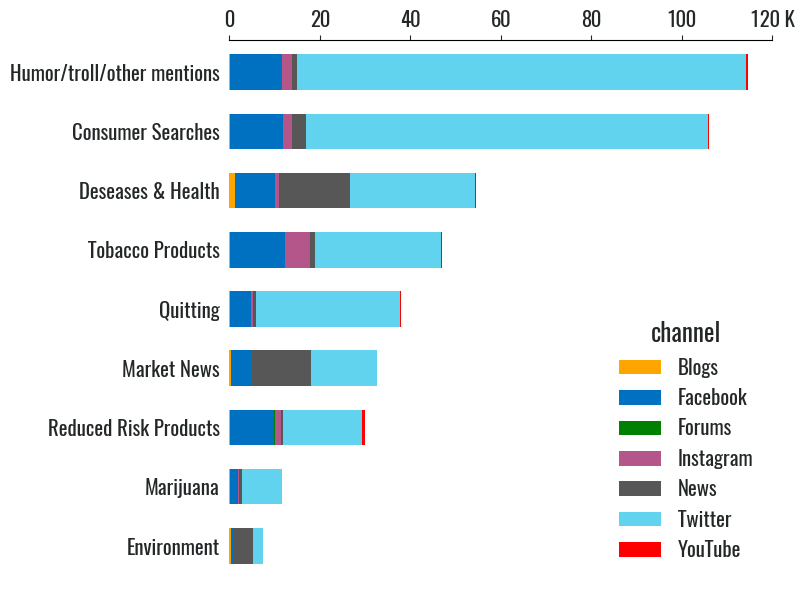

In [65]:
plt.rcParams.update({
    'axes.facecolor': 'white',
    'savefig.facecolor': 'white',
    'figure.facecolor': 'white',
    'axes.spines.left': False,
    'axes.spines.bottom': False,
    'axes.spines.top': True,
    'axes.spines.right': False,
    #'axes.grid':True
#   'grid.color':'#ffffff',
#   'grid.linewidth':2,
#    'grid.alpha':0.6,
    'xtick.top': True,
    'xtick.bottom': False,
    'xtick.color': '#232728',
    'ytick.color':'#232728',
    #'ytick.bottom': True,
    #'ytick.color': 'black'
    #'xtick.major.size': 7,
    #'xtick.major.width': 3,
    #'xtick.major.pad': 0,
    #'xtick.direction': 'in',
    'xtick.labelsize': 'small',
    'ytick.labelsize': 'small',
    'legend.loc': 'best',
     'legend.frameon': False,
     'legend.fontsize': 'small',
#      'legend.handlelength': 0.5,
#      'legend.handleheight': 0.5,
    #'legend.columnspacing': 2.0,
    'font.family': 'Oswald',
    'font.size':18,
    'text.color':'#232728',
     })


def get_words(value, pos):
    thousands = int(value / 1000)
    if thousands == 120:
        return "{} K".format(thousands)
    else: 
        return "{}".format(thousands)
    
formatter = FuncFormatter(get_words)


ax = df5.plot(kind='barh',stacked=True,x='topic',color=bar_colors,figsize=(7,7), width=0.6)

ax.xaxis.set_major_formatter(formatter)

ax.xaxis.label.set_visible(False)
ax.yaxis.label.set_visible(False)
ax.tick_params(left=False)
ax.tick_params(bottom=False)
ax.set_xlim(0,120000)

plt.tick_params(
      axis='x',          # changes apply to the x-axis
      which='major',      # both major and minor ticks are affected
      bottom=False,      # ticks along the bottom edge are off
      top=True,         # ticks along the top edge are off
      labelbottom=False,
      labeltop=True) # labels along the bottom edge are off

# ax.set_xticks([0,1.5,3,4.5])
# ax.set_xticklabels(['0','1.5','3','4.5K'],color='black')


#ax.set_xticklabels([])

plt.savefig("channel_topic_n.pdf")
# plt.savefig("topics_buzz_n.png")
plt.show()

In [66]:
df6 = df5.copy()

In [67]:
df6

channel,topic,Blogs,Facebook,Forums,Instagram,News,Twitter,YouTube
2,Environment,232.0,499.0,0.0,20.0,4527.0,2171.0,9.0
4,Marijuana,34.0,1874.0,0.0,153.0,636.0,8902.0,56.0
7,Reduced Risk Products,30.0,9847.0,246.0,1178.0,553.0,17443.0,601.0
5,Market News,362.0,4572.0,14.0,30.0,13082.0,14497.0,26.0
6,Quitting,24.0,4693.0,8.0,553.0,562.0,31873.0,119.0
8,Tobacco Products,65.0,12215.0,91.0,5495.0,1032.0,27858.0,145.0
1,Deseases & Health,1199.0,8786.0,101.0,775.0,15894.0,27634.0,95.0
0,Consumer Searches,156.0,11734.0,45.0,1967.0,2942.0,88917.0,233.0
3,Humor/troll/other mentions,80.0,11473.0,8.0,2206.0,1184.0,99286.0,527.0


In [68]:
df6['total'] = df6.sum(axis=1)

In [69]:
df6

channel,topic,Blogs,Facebook,Forums,Instagram,News,Twitter,YouTube,total
2,Environment,232.0,499.0,0.0,20.0,4527.0,2171.0,9.0,7458.0
4,Marijuana,34.0,1874.0,0.0,153.0,636.0,8902.0,56.0,11655.0
7,Reduced Risk Products,30.0,9847.0,246.0,1178.0,553.0,17443.0,601.0,29898.0
5,Market News,362.0,4572.0,14.0,30.0,13082.0,14497.0,26.0,32583.0
6,Quitting,24.0,4693.0,8.0,553.0,562.0,31873.0,119.0,37832.0
8,Tobacco Products,65.0,12215.0,91.0,5495.0,1032.0,27858.0,145.0,46901.0
1,Deseases & Health,1199.0,8786.0,101.0,775.0,15894.0,27634.0,95.0,54484.0
0,Consumer Searches,156.0,11734.0,45.0,1967.0,2942.0,88917.0,233.0,105994.0
3,Humor/troll/other mentions,80.0,11473.0,8.0,2206.0,1184.0,99286.0,527.0,114764.0


In [70]:
df6['Blogs'] = round(df6.Blogs*100/df6.total,1)
df6['Facebook'] = round(df6.Facebook*100/df6.total,1)
df6['Forums'] = round(df6.Forums*100/df6.total,1)
df6['Instagram'] = round(df6.Instagram*100/df6.total,1)
df6['News'] = round(df6.News*100/df6.total,1)
df6['Twitter'] = round(df6.Twitter*100/df6.total,1)
df6['YouTube'] = round(df6.YouTube*100/df6.total,1)

In [71]:
df6

channel,topic,Blogs,Facebook,Forums,Instagram,News,Twitter,YouTube,total
2,Environment,3.1,6.7,0.0,0.3,60.7,29.1,0.1,7458.0
4,Marijuana,0.3,16.1,0.0,1.3,5.5,76.4,0.5,11655.0
7,Reduced Risk Products,0.1,32.9,0.8,3.9,1.8,58.3,2.0,29898.0
5,Market News,1.1,14.0,0.0,0.1,40.1,44.5,0.1,32583.0
6,Quitting,0.1,12.4,0.0,1.5,1.5,84.2,0.3,37832.0
8,Tobacco Products,0.1,26.0,0.2,11.7,2.2,59.4,0.3,46901.0
1,Deseases & Health,2.2,16.1,0.2,1.4,29.2,50.7,0.2,54484.0
0,Consumer Searches,0.1,11.1,0.0,1.9,2.8,83.9,0.2,105994.0
3,Humor/troll/other mentions,0.1,10.0,0.0,1.9,1.0,86.5,0.5,114764.0


In [72]:
df6.drop(columns='total',inplace=True)
df6.head(1)

channel,topic,Blogs,Facebook,Forums,Instagram,News,Twitter,YouTube
2,Environment,3.1,6.7,0.0,0.3,60.7,29.1,0.1


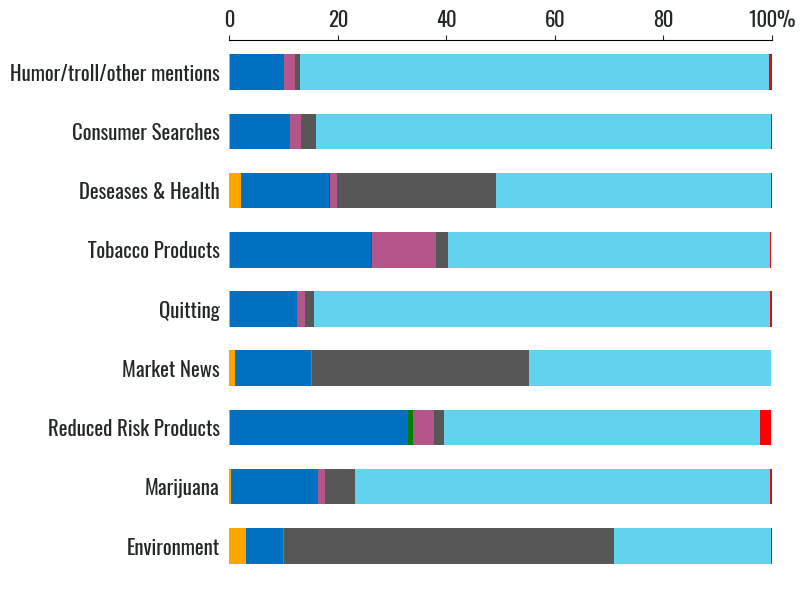

In [73]:
plt.rcParams.update({
    'axes.facecolor': 'white',
    'savefig.facecolor': 'white',
    'figure.facecolor': 'white',
    'axes.spines.left': False,
    'axes.spines.bottom': False,
    'axes.spines.top': True,
    'axes.spines.right': False,
    #'axes.grid':True
#   'grid.color':'#ffffff',
#   'grid.linewidth':2,
#    'grid.alpha':0.6,
    'xtick.top': True,
    'xtick.bottom': False,
    'xtick.color': '#232728',
    'ytick.color':'#232728',
    #'ytick.bottom': True,
    #'ytick.color': 'black'
    #'xtick.major.size': 7,
    #'xtick.major.width': 3,
    #'xtick.major.pad': 0,
    #'xtick.direction': 'in',
    'xtick.labelsize': 'small',
    'ytick.labelsize': 'small',
    'legend.loc': 'best',
     'legend.frameon': False,
     'legend.fontsize': 'small',
#      'legend.handlelength': 0.5,
#      'legend.handleheight': 0.5,
    #'legend.columnspacing': 2.0,
    'font.family': 'Oswald',
    'font.size':18,
    'text.color':'#232728',
     })


ax = df6.plot(kind='barh',stacked=True,x='topic',color=bar_colors,figsize=(7,7), width=0.6)

ax.xaxis.label.set_visible(False)
ax.yaxis.label.set_visible(False)
ax.tick_params(left=False)
ax.tick_params(bottom=False)
ax.set_xlim(0,100)

plt.tick_params(
      axis='x',          # changes apply to the x-axis
      which='major',      # both major and minor ticks are affected
      bottom=False,      # ticks along the bottom edge are off
      top=True,         # ticks along the top edge are off
      labelbottom=False,
      labeltop=True) # labels along the bottom edge are off

ax.set_xticks([0,20,40,60,80,100])
ax.set_xticklabels(['0','20','40','60','80','100%'])

ax.legend_.remove()
#ax.set_xticklabels([])

plt.savefig("channel_topic_pct.pdf")
# plt.savefig("topics_buzz_n.png")
plt.show()

In [74]:
df7 = df3[['topic','sentiment']].copy()
df7.head()

,topic,sentiment
0,Consumer Searches,neutral
1,Consumer Searches,neutral
2,Tobacco Products,neutral
3,Humor/troll/other mentions,neutral
4,Humor/troll/other mentions,neutral


In [75]:
df8 = df7.groupby('topic').sentiment.value_counts().unstack().reset_index().fillna(0)

In [76]:
df8

sentiment,topic,negative,neutral,positive
0,Consumer Searches,12194,89823,3977
1,Deseases & Health,17773,35518,1193
2,Environment,1288,6160,10
3,Humor/troll/other mentions,1638,112860,266
4,Marijuana,1021,10503,131
5,Market News,1290,31227,66
6,Quitting,10688,24405,2739
7,Reduced Risk Products,3854,25734,310
8,Tobacco Products,3145,43334,422


In [77]:
df8['total'] = df8.sum(axis=1)
df8 = df8.sort_values(by='total')
df8

sentiment,topic,negative,neutral,positive,total
2,Environment,1288,6160,10,7458
4,Marijuana,1021,10503,131,11655
7,Reduced Risk Products,3854,25734,310,29898
5,Market News,1290,31227,66,32583
6,Quitting,10688,24405,2739,37832
8,Tobacco Products,3145,43334,422,46901
1,Deseases & Health,17773,35518,1193,54484
0,Consumer Searches,12194,89823,3977,105994
3,Humor/troll/other mentions,1638,112860,266,114764


In [78]:
df8['negative'] = round(df8.negative*100/df8.total,1)
df8['neutral'] = round(df8.neutral*100/df8.total,1)
df8['positive'] = round(df8.positive*100/df8.total,1)

In [79]:
df8

sentiment,topic,negative,neutral,positive,total
2,Environment,17.3,82.6,0.1,7458
4,Marijuana,8.8,90.1,1.1,11655
7,Reduced Risk Products,12.9,86.1,1.0,29898
5,Market News,4.0,95.8,0.2,32583
6,Quitting,28.3,64.5,7.2,37832
8,Tobacco Products,6.7,92.4,0.9,46901
1,Deseases & Health,32.6,65.2,2.2,54484
0,Consumer Searches,11.5,84.7,3.8,105994
3,Humor/troll/other mentions,1.4,98.3,0.2,114764


In [80]:
df8.drop(columns='total',inplace=True)
df8.head(1)

sentiment,topic,negative,neutral,positive
2,Environment,17.3,82.6,0.1


In [81]:
sent_colors = ['#F23A43','#DDDDDD','#95C94A']

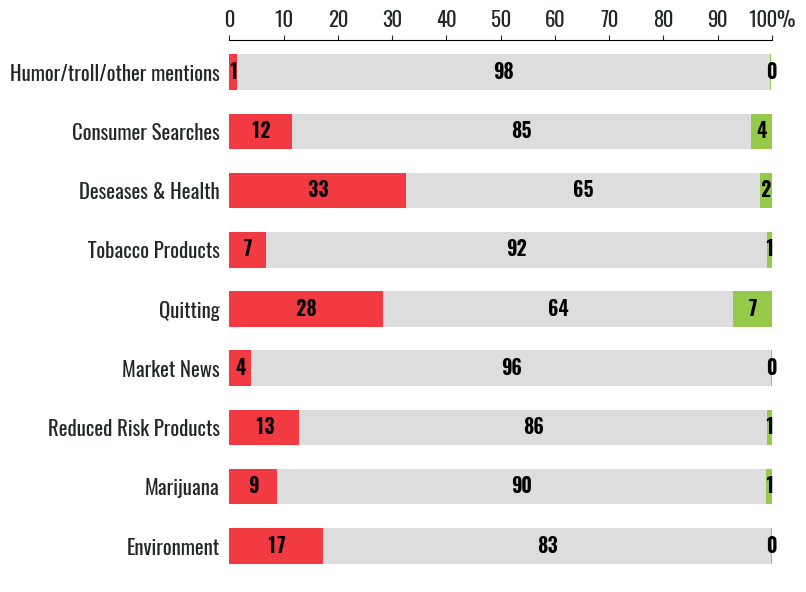

In [82]:
plt.rcParams.update({
    'axes.facecolor': 'white',
    'savefig.facecolor': 'white',
    'figure.facecolor': 'white',
    'axes.spines.left': False,
    'axes.spines.bottom': False,
    'axes.spines.top': True,
    'axes.spines.right': False,
    #'axes.grid':True
#   'grid.color':'#ffffff',
#   'grid.linewidth':2,
#    'grid.alpha':0.6,
    'xtick.top': True,
    'xtick.bottom': False,
    'xtick.color': '#232728',
    'ytick.color':'#232728',
    #'ytick.bottom': True,
    #'ytick.color': 'black'
    #'xtick.major.size': 7,
    #'xtick.major.width': 3,
    #'xtick.major.pad': 0,
    #'xtick.direction': 'in',
    'xtick.labelsize': 'small',
    'ytick.labelsize': 'small',
    'legend.loc': 'best',
     'legend.frameon': False,
     'legend.fontsize': 'small',
#      'legend.handlelength': 0.5,
#      'legend.handleheight': 0.5,
    #'legend.columnspacing': 2.0,
    'font.family': 'Oswald',
    'font.size':18,
    'text.color':'#232728',
     })

ax = df8.plot(kind='barh',stacked=True,x='topic',color=sent_colors,figsize=(7,7), width=0.6)

# for j in range(len(ax.patches)):
for i, patch in enumerate(ax.patches):
# print(i)
    bl = patch.get_xy()
    value= int(round(patch.get_width()))
    x_pos = 0.5*patch.get_width() + bl[0]
    y_pos = 0.5*patch.get_height() + bl[1]
    ax.text(x_pos,y_pos,value,va='center',ha='center',color='black',fontweight='bold',fontsize=14)

ax.xaxis.label.set_visible(False)
ax.yaxis.label.set_visible(False)
ax.tick_params(left=False)
ax.tick_params(bottom=False)
ax.set_xlim(0,100)

plt.tick_params(
      axis='x',          # changes apply to the x-axis
      which='major',      # both major and minor ticks are affected
      bottom=False,      # ticks along the bottom edge are off
      top=True,         # ticks along the top edge are off
      labelbottom=False,
      labeltop=True) # labels along the bottom edge are off

ax.set_xticks([0,10,20,30,40,50,60,70,80,90,100])
ax.set_xticklabels(['0','10','20','30','40','50','60','70','80','90','100%'])

ax.legend_.remove()

#ax.set_xticklabels([])

plt.savefig("topic_sentiment_overall.pdf")
# plt.savefig("topics_buzz_n.png")
plt.show()

In [83]:
### Τσεκάραμε με τον Άγη ότι το σύστημα έχει μπερδευτεί στα news και ότι στην πλειονότητά τους τα positive είναι neutral, στην πραγματικότητα. Άρα, αλλάζω τα data και το ξανατρέχω.

In [84]:
#df3.loc[(df3.topic == 'Environment')&(df3.channel == 'News')&(df3.sentiment=='positive'),'sentiment'] = 'neutral'

In [85]:
df7.head()

,topic,sentiment
0,Consumer Searches,neutral
1,Consumer Searches,neutral
2,Tobacco Products,neutral
3,Humor/troll/other mentions,neutral
4,Humor/troll/other mentions,neutral


In [86]:
df7.sentiment.value_counts(normalize=True)*100

neutral     85.958027
negative    11.977969
positive     2.064004
Name: sentiment, dtype: float64

In [87]:
df9 = df7[df7.sentiment != 'neutral']
df9.head(10)

,topic,sentiment
2205,Tobacco Products,negative
2212,Reduced Risk Products,negative
2213,Reduced Risk Products,negative
2214,Reduced Risk Products,negative
2253,Reduced Risk Products,negative
2257,Reduced Risk Products,positive
2260,Reduced Risk Products,negative
2261,Reduced Risk Products,negative
2262,Reduced Risk Products,negative
2263,Consumer Searches,negative


In [88]:
df9.sentiment.value_counts()

negative    52891
positive     9114
Name: sentiment, dtype: int64

In [89]:
round(df9.sentiment.value_counts(normalize=True)*100,1)

negative    85.3
positive    14.7
Name: sentiment, dtype: float64

In [200]:
df9.sentiment.value_counts().sum()

62005

### Consumer Searches

In [110]:
searches_buzz = monthly[monthly.topic == "Consumer Searches"]
searches_buzz.head()

,month,topic,channel
0,2017-09,Consumer Searches,Instagram
1,2017-09,Consumer Searches,Instagram
5,2017-09,Consumer Searches,Instagram
10,2017-09,Consumer Searches,Instagram
11,2017-09,Consumer Searches,Instagram


In [118]:
searches_buzz1 = searches_buzz.groupby('month').agg('count')
searches_buzz1.sort_index(inplace=True)
searches_buzz1 = searches_buzz1.reset_index()
# searches_buzz1 = searches_buzz1.rename(columns={'index':'count'})

In [125]:
searches_buzz2 = searches_buzz.groupby(['month','channel']).topic.agg('count')
searches_buzz2.sort_index(inplace=True)
searches_buzz2 = searches_buzz2.reset_index()
# searches_buzz1 = searches_buzz1.rename(columns={'index':'count'})

In [120]:
searches_buzz1

,month,topic,channel
0,2017-09,7323,7323
1,2017-10,6940,6940
2,2017-11,9717,9717
3,2017-12,8833,8833
4,2018-01,10682,10682
5,2018-02,10498,10498
6,2018-03,13328,13328
7,2018-04,7753,7753
8,2018-05,7028,7028
9,2018-06,7293,7293


In [128]:
searches_buzz2

,month,channel,topic
0,2017-09,Facebook,667
1,2017-09,Forums,6
2,2017-09,Instagram,263
3,2017-09,News,94
4,2017-09,Twitter,6280
5,2017-09,YouTube,13
6,2017-10,Facebook,790
7,2017-10,Forums,12
8,2017-10,Instagram,204
9,2017-10,News,159


In [127]:
searches_buzz2.topic.sum()

105994

In [119]:
searches_buzz1.sum()

month      2017-092017-102017-112017-122018-012018-022018...
topic                                                 105994
channel                                               105994
dtype: object

In [135]:
import numpy
from matplotlib import pyplot

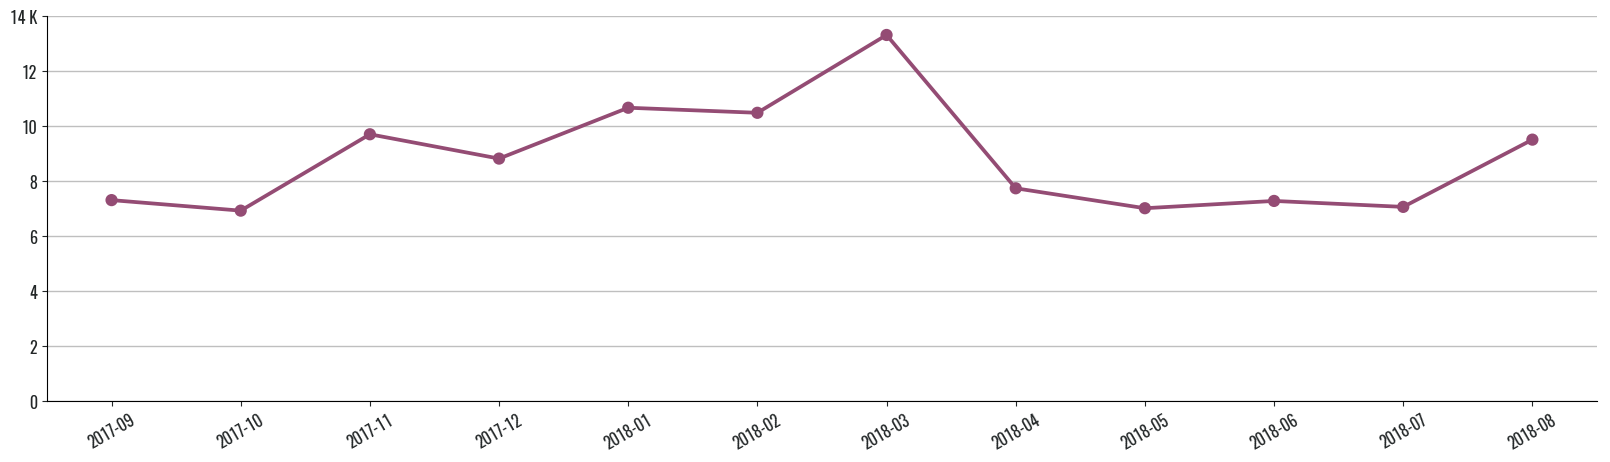

In [172]:
plt.figure(figsize=(20,5))

def with_words(value, pos):
    thousands = int(value / 1000)
    if thousands == 14:
        return "{} K".format(thousands)
    else: 
        return "{}".format(thousands)
    
formatter = FuncFormatter(with_words)


# ax = sns.pointplot(data=searches_buzz2, x='month',  y='topic', hue='channel',hue_order=['twitter', 'web','instagram','youtube','facebook'],pallete=['#61D3EE','#575757','#B5568A','#FF0000','#0070C0'])
ax = sns.pointplot(data=searches_buzz1, x='month',  y='topic',color='#944C74')
# plt.setp(ax.collections, sizes=[1])
labels = ax.get_xticklabels() # get x labels


ax.yaxis.set_major_formatter(formatter)
ax.set_xticklabels(labels, rotation=30) # set new labels

plt.rcParams.update({
    'axes.grid':True,
   'grid.color':'grey',
   'grid.linewidth':1,
   'grid.alpha':0.5
})

ax.xaxis.label.set_visible(False)
ax.yaxis.label.set_visible(False)
ax.tick_params(left=True)
ax.set_ylim(0,14000)

plt.savefig("searches_buzz_month_UPD.pdf")
plt.show()

In [149]:
searches_buzz1

,month,topic,channel
0,2017-09,7323,7323
1,2017-10,6940,6940
2,2017-11,9717,9717
3,2017-12,8833,8833
4,2018-01,10682,10682
5,2018-02,10498,10498
6,2018-03,13328,13328
7,2018-04,7753,7753
8,2018-05,7028,7028
9,2018-06,7293,7293


In [90]:
searches = df3[df3.topic == "Consumer Searches"]

In [91]:
searches.head(2)

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Unnamed: 0.1.1.1,channel,item_type,id,createdAt,impact,info,...,[2],norm_text,norm_snippet,predicted_tag,predicted_spam,tag,norm_tag,date,month,topic
0,0,0,0,0,Instagram,media,795_instagram_media_96bf0088e597c535289704a859...,2017-09-03 01:29:21,NaN,nikos_votzakis,...,NaN,δεν ξερω πωσ σε λενε δεν ξερω το προσωπο σου ε...,δεν ξερω πωσ σε λενε δεν ξερω το προσωπο σου ε...,[1] Συνήθειες,ham,[1] Consumer Searches,[1]συνηθειες,2017-09-03,2017-09,Consumer Searches
1,1,1,1,1,Instagram,media,795_instagram_media_f832a68c8eaa9b22e44db1c0ca...,2017-09-17 12:36:31,NaN,kostas_kalio,...,NaN,δωσ μου ποτα τσιγαρα βαρια μεχρι να μην την σκ...,δωσ μου ποτα τσιγαρα βαρια μεχρι να μην την σκ...,[1] Συνήθειες,ham,[1] Consumer Searches,[1]συνηθειες,2017-09-17,2017-09,Consumer Searches


In [92]:
searches.channel.value_counts()

Twitter      88917
Facebook     11734
News          2942
Instagram     1967
YouTube        233
Blogs          156
Forums          45
Name: channel, dtype: int64

In [93]:
round(searches.channel.value_counts(normalize=True)*100,1)

Twitter      83.9
Facebook     11.1
News          2.8
Instagram     1.9
YouTube       0.2
Blogs         0.1
Forums        0.0
Name: channel, dtype: float64

In [94]:
searches1 = searches[['channel','sentiment']].copy()
searches1.head()

,channel,sentiment
0,Instagram,neutral
1,Instagram,neutral
5,Instagram,neutral
10,Instagram,neutral
11,Instagram,neutral


In [95]:
searches2 = searches1.groupby('channel').sentiment.value_counts().unstack().reset_index().fillna(0)
searches2

sentiment,channel,negative,neutral,positive
0,Blogs,22,129,5
1,Facebook,586,10800,348
2,Forums,6,38,1
3,Instagram,86,1746,135
4,News,195,2685,62
5,Twitter,11251,74272,3394
6,YouTube,48,153,32


In [96]:
searches2['total'] = searches2.sum(axis=1)
searches2.sort_values(by='total',inplace=True)
searches2

sentiment,channel,negative,neutral,positive,total
2,Forums,6,38,1,45
0,Blogs,22,129,5,156
6,YouTube,48,153,32,233
3,Instagram,86,1746,135,1967
4,News,195,2685,62,2942
1,Facebook,586,10800,348,11734
5,Twitter,11251,74272,3394,88917


In [97]:
searches3 = searches2.copy()

In [98]:
searches3['negative'] = round(searches2.negative*100/searches2.total,1)
searches3['positive'] = round(searches2.positive*100/searches2.total,1)
searches3['neutral'] = round(searches2.neutral*100/searches2.total,1)

In [99]:
searches3

sentiment,channel,negative,neutral,positive,total
2,Forums,13.3,84.4,2.2,45
0,Blogs,14.1,82.7,3.2,156
6,YouTube,20.6,65.7,13.7,233
3,Instagram,4.4,88.8,6.9,1967
4,News,6.6,91.3,2.1,2942
1,Facebook,5.0,92.0,3.0,11734
5,Twitter,12.7,83.5,3.8,88917


In [100]:
searches3.drop(columns='total',inplace=True)
searches3

sentiment,channel,negative,neutral,positive
2,Forums,13.3,84.4,2.2
0,Blogs,14.1,82.7,3.2
6,YouTube,20.6,65.7,13.7
3,Instagram,4.4,88.8,6.9
4,News,6.6,91.3,2.1
1,Facebook,5.0,92.0,3.0
5,Twitter,12.7,83.5,3.8


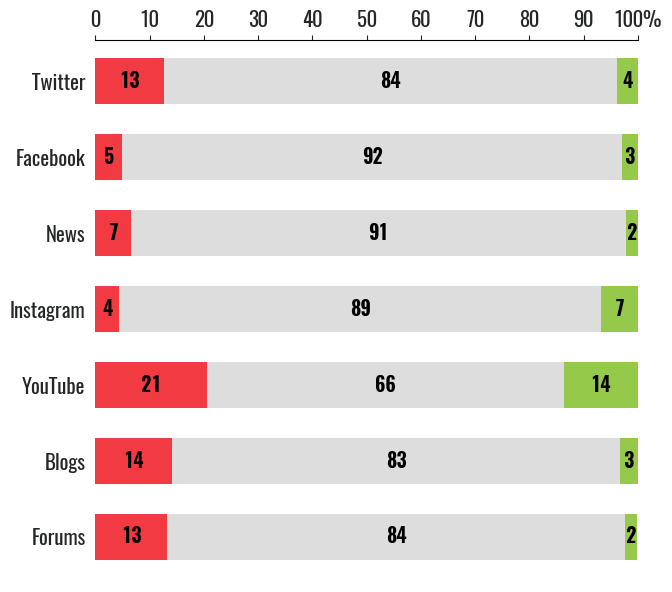

In [101]:
plt.rcParams.update({
    'axes.facecolor': 'white',
    'savefig.facecolor': 'white',
    'figure.facecolor': 'white',
    'axes.spines.left': False,
    'axes.spines.bottom': False,
    'axes.spines.top': True,
    'axes.spines.right': False,
    #'axes.grid':True
#   'grid.color':'#ffffff',
#   'grid.linewidth':2,
#    'grid.alpha':0.6,
    'xtick.top': True,
    'xtick.bottom': False,
    'xtick.color': '#232728',
    'ytick.color':'#232728',
    #'ytick.bottom': True,
    #'ytick.color': 'black'
    #'xtick.major.size': 7,
    #'xtick.major.width': 3,
    #'xtick.major.pad': 0,
    #'xtick.direction': 'in',
    'xtick.labelsize': 'small',
    'ytick.labelsize': 'small',
    'legend.loc': 'best',
     'legend.frameon': False,
     'legend.fontsize': 'small',
#      'legend.handlelength': 0.5,
#      'legend.handleheight': 0.5,
    #'legend.columnspacing': 2.0,
    'font.family': 'Oswald',
    'font.size':18,
    'text.color':'#232728',
     })

ax = searches3.plot(kind='barh',stacked=True,x='channel',color=sent_colors,figsize=(7,7), width=0.6)

# for j in range(len(ax.patches)):
for i, patch in enumerate(ax.patches):
# print(i)
    bl = patch.get_xy()
    value= int(round(patch.get_width()))
    x_pos = 0.5*patch.get_width() + bl[0]
    y_pos = 0.5*patch.get_height() + bl[1]
    ax.text(x_pos,y_pos,value,va='center',ha='center',color='black',fontweight='bold',fontsize=14)

ax.xaxis.label.set_visible(False)
ax.yaxis.label.set_visible(False)
ax.tick_params(left=False)
ax.tick_params(bottom=False)
ax.set_xlim(0,100)

plt.tick_params(
      axis='x',          # changes apply to the x-axis
      which='major',      # both major and minor ticks are affected
      bottom=False,      # ticks along the bottom edge are off
      top=True,         # ticks along the top edge are off
      labelbottom=False,
      labeltop=True) # labels along the bottom edge are off

ax.set_xticks([0,10,20,30,40,50,60,70,80,90,100])
ax.set_xticklabels(['0','10','20','30','40','50','60','70','80','90','100%'])

ax.legend_.remove()

#ax.set_xticklabels([])

plt.savefig("searches_sent.pdf")
# plt.savefig("topics_buzz_n.png")
plt.show()

In [102]:
searches2.total.sum()

105994

In [103]:
searches4 = searches1[searches1.sentiment != 'neutral']
searches4.head(10)

,channel,sentiment
2263,Facebook,negative
2264,Twitter,negative
2448,Instagram,negative
2717,Twitter,positive
2718,Twitter,positive
2719,Twitter,positive
2720,Twitter,positive
2721,Twitter,positive
2722,Twitter,positive
2723,Twitter,positive


In [104]:
searches4.sentiment.value_counts()

negative    12194
positive     3977
Name: sentiment, dtype: int64

In [105]:
searches4.sentiment.value_counts().sum()

16171

### Tobacco Products

In [157]:
tobacco_buzz = monthly[monthly.topic == "Tobacco Products"]
tobacco_buzz.head()

,month,topic,channel
2,2017-09,Tobacco Products,Instagram
6,2017-09,Tobacco Products,Instagram
7,2017-09,Tobacco Products,Instagram
9,2017-09,Tobacco Products,Instagram
14,2017-09,Tobacco Products,Instagram


In [158]:
tobacco_buzz1 = tobacco_buzz.groupby('month').agg('count')
tobacco_buzz1.sort_index(inplace=True)
tobacco_buzz1 = tobacco_buzz1.reset_index()

In [159]:
tobacco_buzz1

,month,topic,channel
0,2017-09,3851,3851
1,2017-10,4375,4375
2,2017-11,7011,7011
3,2017-12,4193,4193
4,2018-01,3917,3917
5,2018-02,4041,4041
6,2018-03,5240,5240
7,2018-04,3629,3629
8,2018-05,2939,2939
9,2018-06,2209,2209


In [160]:
tobacco_buzz1.sum()

month      2017-092017-102017-112017-122018-012018-022018...
topic                                                  46901
channel                                                46901
dtype: object

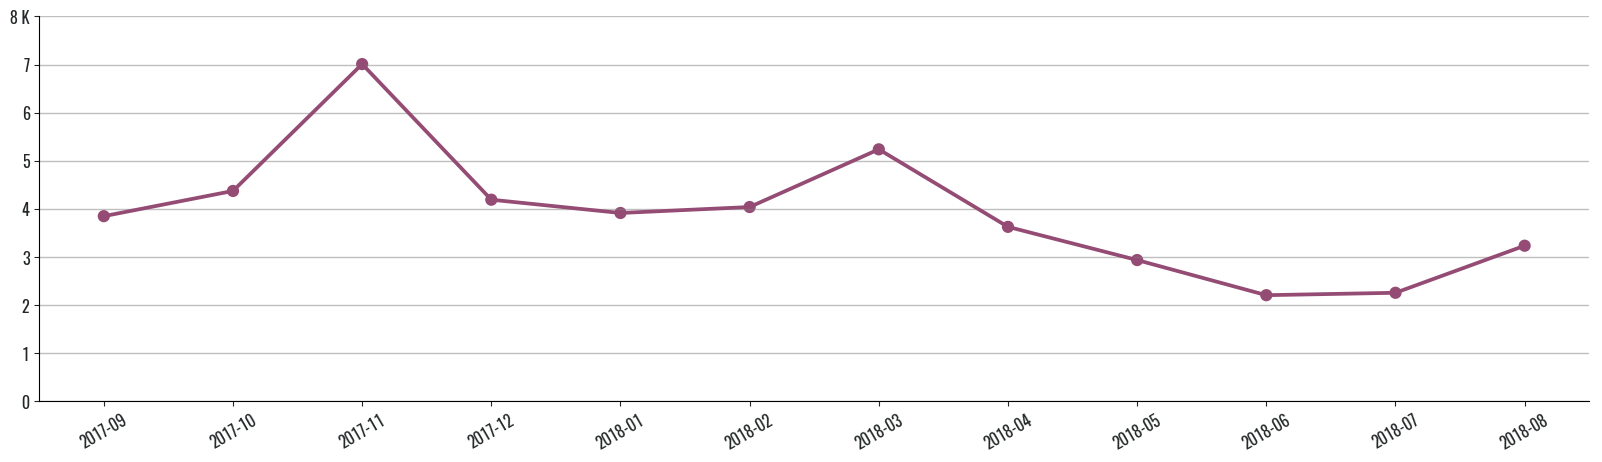

In [173]:
plt.figure(figsize=(20,5))

def with_words(value, pos):
    thousands = int(value / 1000)
    if thousands == 8:
        return "{} K".format(thousands)
    else: 
        return "{}".format(thousands)
    
formatter = FuncFormatter(with_words)


# ax = sns.pointplot(data=searches_buzz2, x='month',  y='topic', hue='channel',hue_order=['twitter', 'web','instagram','youtube','facebook'],pallete=['#61D3EE','#575757','#B5568A','#FF0000','#0070C0'])
ax = sns.pointplot(data=tobacco_buzz1, x='month',  y='topic',color='#944C74')
# plt.setp(ax.collections, sizes=[1])
labels = ax.get_xticklabels() # get x labels


ax.yaxis.set_major_formatter(formatter)
ax.set_xticklabels(labels, rotation=30) # set new labels

plt.rcParams.update({
    'axes.grid':True,
   'grid.color':'grey',
   'grid.linewidth':1,
   'grid.alpha':0.5
})

ax.xaxis.label.set_visible(False)
ax.yaxis.label.set_visible(False)
ax.tick_params(left=True)
ax.set_ylim(0,8000)

plt.savefig("tobacco_buzz_month.pdf")
plt.show()

In [106]:
tobaccopr = df3[df3.topic == "Tobacco Products"]

In [107]:
tobaccopr1 = tobaccopr[['channel','sentiment']].copy()
tobaccopr1.head()

,channel,sentiment
2,Instagram,neutral
6,Instagram,neutral
7,Instagram,neutral
9,Instagram,neutral
14,Instagram,neutral


In [108]:
tobaccopr2 = tobaccopr1.groupby('channel').sentiment.value_counts().unstack().reset_index().fillna(0)
tobaccopr2

sentiment,channel,negative,neutral,positive
0,Blogs,5.0,60.0,0.0
1,Facebook,306.0,11853.0,56.0
2,Forums,4.0,81.0,6.0
3,Instagram,272.0,5115.0,108.0
4,News,63.0,964.0,5.0
5,Twitter,2478.0,25142.0,238.0
6,YouTube,17.0,119.0,9.0


In [109]:
tobaccopr2['total'] = tobaccopr2.sum(axis=1)
tobaccopr2.sort_values(by='total',inplace=True)
tobaccopr2

sentiment,channel,negative,neutral,positive,total
0,Blogs,5.0,60.0,0.0,65.0
2,Forums,4.0,81.0,6.0,91.0
6,YouTube,17.0,119.0,9.0,145.0
4,News,63.0,964.0,5.0,1032.0
3,Instagram,272.0,5115.0,108.0,5495.0
1,Facebook,306.0,11853.0,56.0,12215.0
5,Twitter,2478.0,25142.0,238.0,27858.0


In [110]:
tobaccopr3 = tobaccopr2.copy()

In [111]:
tobaccopr3['negative'] = round(tobaccopr2.negative*100/tobaccopr2.total,1)
tobaccopr3['positive'] = round(tobaccopr2.positive*100/tobaccopr2.total,1)
tobaccopr3['neutral'] = round(tobaccopr2.neutral*100/tobaccopr2.total,1)

In [112]:
tobaccopr3

sentiment,channel,negative,neutral,positive,total
0,Blogs,7.7,92.3,0.0,65.0
2,Forums,4.4,89.0,6.6,91.0
6,YouTube,11.7,82.1,6.2,145.0
4,News,6.1,93.4,0.5,1032.0
3,Instagram,4.9,93.1,2.0,5495.0
1,Facebook,2.5,97.0,0.5,12215.0
5,Twitter,8.9,90.3,0.9,27858.0


In [113]:
tobaccopr3.drop(columns='total',inplace=True)
tobaccopr3

sentiment,channel,negative,neutral,positive
0,Blogs,7.7,92.3,0.0
2,Forums,4.4,89.0,6.6
6,YouTube,11.7,82.1,6.2
4,News,6.1,93.4,0.5
3,Instagram,4.9,93.1,2.0
1,Facebook,2.5,97.0,0.5
5,Twitter,8.9,90.3,0.9


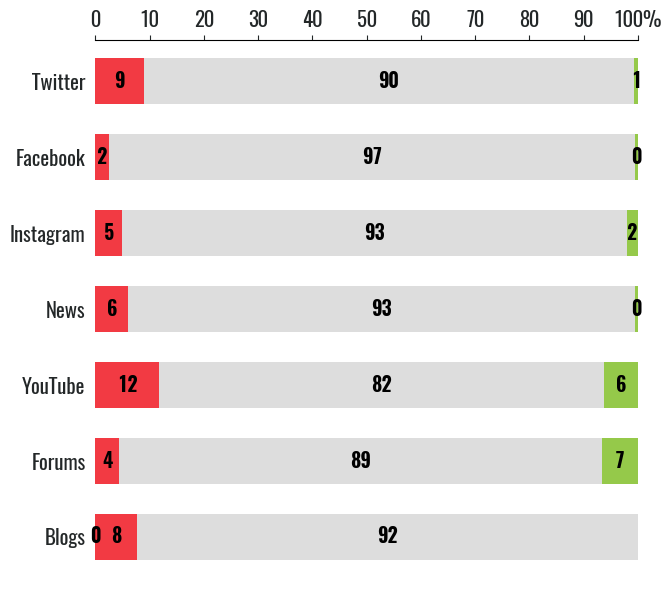

In [114]:
plt.rcParams.update({
    'axes.facecolor': 'white',
    'savefig.facecolor': 'white',
    'figure.facecolor': 'white',
    'axes.spines.left': False,
    'axes.spines.bottom': False,
    'axes.spines.top': True,
    'axes.spines.right': False,
    #'axes.grid':True
#   'grid.color':'#ffffff',
#   'grid.linewidth':2,
#    'grid.alpha':0.6,
    'xtick.top': True,
    'xtick.bottom': False,
    'xtick.color': '#232728',
    'ytick.color':'#232728',
    #'ytick.bottom': True,
    #'ytick.color': 'black'
    #'xtick.major.size': 7,
    #'xtick.major.width': 3,
    #'xtick.major.pad': 0,
    #'xtick.direction': 'in',
    'xtick.labelsize': 'small',
    'ytick.labelsize': 'small',
    'legend.loc': 'best',
     'legend.frameon': False,
     'legend.fontsize': 'small',
#      'legend.handlelength': 0.5,
#      'legend.handleheight': 0.5,
    #'legend.columnspacing': 2.0,
    'font.family': 'Oswald',
    'font.size':18,
    'text.color':'#232728',
     })

ax = tobaccopr3.plot(kind='barh',stacked=True,x='channel',color=sent_colors,figsize=(7,7), width=0.6)

# for j in range(len(ax.patches)):
for i, patch in enumerate(ax.patches):
# print(i)
    bl = patch.get_xy()
    value= int(round(patch.get_width()))
    x_pos = 0.5*patch.get_width() + bl[0]
    y_pos = 0.5*patch.get_height() + bl[1]
    ax.text(x_pos,y_pos,value,va='center',ha='center',color='black',fontweight='bold',fontsize=14)

ax.xaxis.label.set_visible(False)
ax.yaxis.label.set_visible(False)
ax.tick_params(left=False)
ax.tick_params(bottom=False)
ax.set_xlim(0,100)

plt.tick_params(
      axis='x',          # changes apply to the x-axis
      which='major',      # both major and minor ticks are affected
      bottom=False,      # ticks along the bottom edge are off
      top=True,         # ticks along the top edge are off
      labelbottom=False,
      labeltop=True) # labels along the bottom edge are off

ax.set_xticks([0,10,20,30,40,50,60,70,80,90,100])
ax.set_xticklabels(['0','10','20','30','40','50','60','70','80','90','100%'])

ax.legend_.remove()

#ax.set_xticklabels([])

plt.savefig("tobaccopr_sent.pdf")
# plt.savefig("topics_buzz_n.png")
plt.show()

In [115]:
tobaccopr4 = tobaccopr1[tobaccopr1.sentiment != 'neutral']
tobaccopr4.head(10)

,channel,sentiment
2205,Twitter,negative
2276,Twitter,negative
2277,Facebook,negative
2343,Twitter,negative
2344,Twitter,negative
2536,Twitter,negative
2537,Twitter,negative
2564,Instagram,negative
2613,Instagram,positive
5552,Facebook,negative


In [116]:
tobaccopr4.sentiment.value_counts()

negative    3145
positive     422
Name: sentiment, dtype: int64

In [117]:
tobaccopr4.sentiment.value_counts().sum()

3567

### Deseases & Health

In [163]:
health_buzz = monthly[monthly.topic == "Deseases & Health"]
health_buzz.head()

,month,topic,channel
115,2017-09,Deseases & Health,Twitter
127,2017-09,Deseases & Health,Twitter
131,2017-09,Deseases & Health,Twitter
146,2017-09,Deseases & Health,Twitter
152,2017-09,Deseases & Health,Twitter


In [164]:
health_buzz1 = health_buzz.groupby('month').agg('count')
health_buzz1.sort_index(inplace=True)
health_buzz1 = health_buzz1.reset_index()

In [165]:
health_buzz1

,month,topic,channel
0,2017-09,4698,4698
1,2017-10,4699,4699
2,2017-11,4693,4693
3,2017-12,3742,3742
4,2018-01,4202,4202
5,2018-02,4967,4967
6,2018-03,6039,6039
7,2018-04,5041,5041
8,2018-05,4666,4666
9,2018-06,3506,3506


In [167]:
health_buzz1.sum()

month      2017-092017-102017-112017-122018-012018-022018...
topic                                                  54484
channel                                                54484
dtype: object

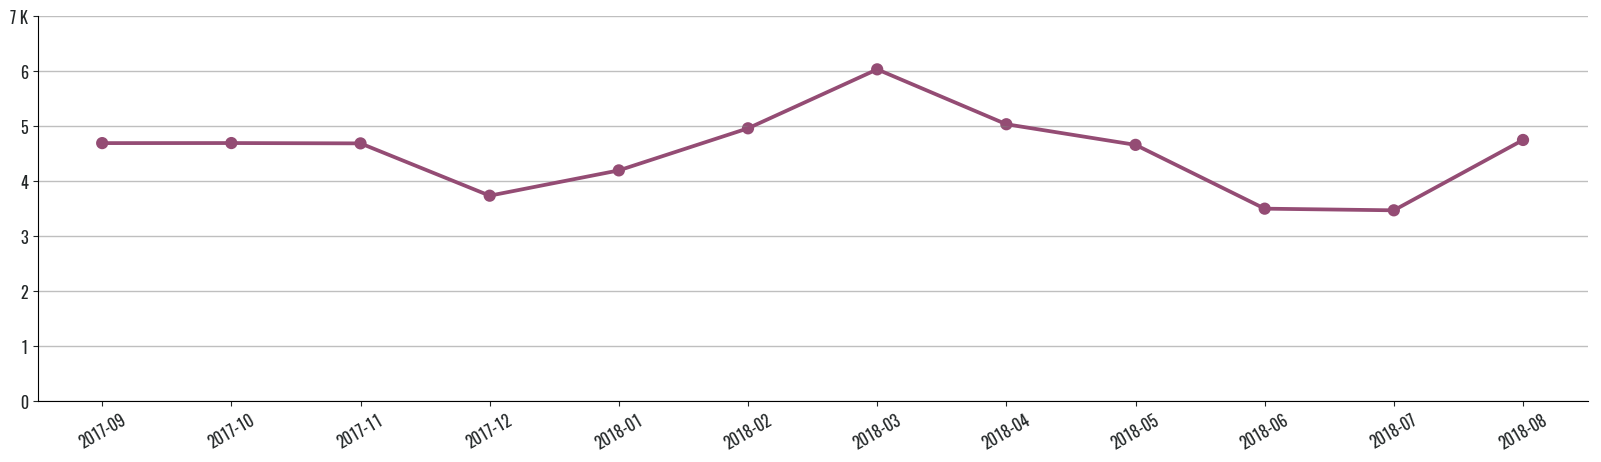

In [174]:
plt.figure(figsize=(20,5))

def with_words(value, pos):
    thousands = int(value / 1000)
    if thousands == 7:
        return "{} K".format(thousands)
    else: 
        return "{}".format(thousands)
    
formatter = FuncFormatter(with_words)


# ax = sns.pointplot(data=searches_buzz2, x='month',  y='topic', hue='channel',hue_order=['twitter', 'web','instagram','youtube','facebook'],pallete=['#61D3EE','#575757','#B5568A','#FF0000','#0070C0'])
ax = sns.pointplot(data=health_buzz1, x='month',  y='topic',color='#944C74')
# plt.setp(ax.collections, sizes=[1])
labels = ax.get_xticklabels() # get x labels


ax.yaxis.set_major_formatter(formatter)
ax.set_xticklabels(labels, rotation=30) # set new labels

plt.rcParams.update({
    'axes.grid':True,
   'grid.color':'grey',
   'grid.linewidth':1,
   'grid.alpha':0.5
})

ax.xaxis.label.set_visible(False)
ax.yaxis.label.set_visible(False)
ax.tick_params(left=True)
ax.set_ylim(0,7000)

plt.savefig("health_buzz_month.pdf")
plt.show()

In [118]:
health = df3[df3.topic == "Deseases & Health"]

In [119]:
#health.head()

In [120]:
health1 = health[['channel','sentiment']].copy()
health1.head()

,channel,sentiment
115,Twitter,neutral
127,Twitter,neutral
131,Twitter,neutral
146,Twitter,neutral
152,Twitter,neutral


In [121]:
health2 = health1.groupby('channel').sentiment.value_counts().unstack().reset_index().fillna(0)
health2

sentiment,channel,negative,neutral,positive
0,Blogs,46.0,1152.0,1.0
1,Facebook,923.0,7834.0,29.0
2,Forums,6.0,95.0,0.0
3,Instagram,180.0,588.0,7.0
4,News,630.0,15230.0,34.0
5,Twitter,15933.0,10580.0,1121.0
6,YouTube,55.0,39.0,1.0


In [122]:
health2['total'] = health2.sum(axis=1)
health2.sort_values(by='total',inplace=True)
health2

sentiment,channel,negative,neutral,positive,total
6,YouTube,55.0,39.0,1.0,95.0
2,Forums,6.0,95.0,0.0,101.0
3,Instagram,180.0,588.0,7.0,775.0
0,Blogs,46.0,1152.0,1.0,1199.0
1,Facebook,923.0,7834.0,29.0,8786.0
4,News,630.0,15230.0,34.0,15894.0
5,Twitter,15933.0,10580.0,1121.0,27634.0


In [123]:
health3 = health2.copy()

In [124]:
health3['negative'] = round(health2.negative*100/health2.total,1)
health3['positive'] = round(health2.positive*100/health2.total,1)
health3['neutral'] = round(health2.neutral*100/health2.total,1)

In [125]:
health3

sentiment,channel,negative,neutral,positive,total
6,YouTube,57.9,41.1,1.1,95.0
2,Forums,5.9,94.1,0.0,101.0
3,Instagram,23.2,75.9,0.9,775.0
0,Blogs,3.8,96.1,0.1,1199.0
1,Facebook,10.5,89.2,0.3,8786.0
4,News,4.0,95.8,0.2,15894.0
5,Twitter,57.7,38.3,4.1,27634.0


In [126]:
health3.drop(columns='total',inplace=True)
health3

sentiment,channel,negative,neutral,positive
6,YouTube,57.9,41.1,1.1
2,Forums,5.9,94.1,0.0
3,Instagram,23.2,75.9,0.9
0,Blogs,3.8,96.1,0.1
1,Facebook,10.5,89.2,0.3
4,News,4.0,95.8,0.2
5,Twitter,57.7,38.3,4.1


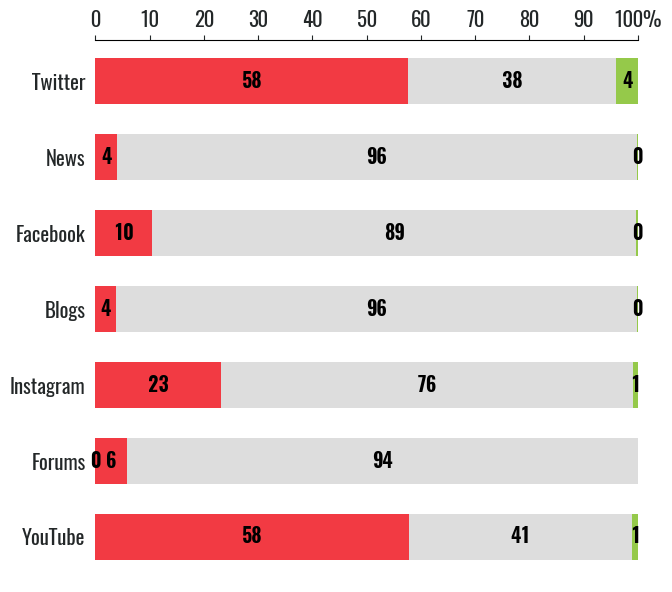

In [127]:
plt.rcParams.update({
    'axes.facecolor': 'white',
    'savefig.facecolor': 'white',
    'figure.facecolor': 'white',
    'axes.spines.left': False,
    'axes.spines.bottom': False,
    'axes.spines.top': True,
    'axes.spines.right': False,
    #'axes.grid':True
#   'grid.color':'#ffffff',
#   'grid.linewidth':2,
#    'grid.alpha':0.6,
    'xtick.top': True,
    'xtick.bottom': False,
    'xtick.color': '#232728',
    'ytick.color':'#232728',
    #'ytick.bottom': True,
    #'ytick.color': 'black'
    #'xtick.major.size': 7,
    #'xtick.major.width': 3,
    #'xtick.major.pad': 0,
    #'xtick.direction': 'in',
    'xtick.labelsize': 'small',
    'ytick.labelsize': 'small',
    'legend.loc': 'best',
     'legend.frameon': False,
     'legend.fontsize': 'small',
#      'legend.handlelength': 0.5,
#      'legend.handleheight': 0.5,
    #'legend.columnspacing': 2.0,
    'font.family': 'Oswald',
    'font.size':18,
    'text.color':'#232728',
     })

ax = health3.plot(kind='barh',stacked=True,x='channel',color=sent_colors,figsize=(7,7), width=0.6)

# for j in range(len(ax.patches)):
for i, patch in enumerate(ax.patches):
# print(i)
    bl = patch.get_xy()
    value= int(round(patch.get_width()))
    x_pos = 0.5*patch.get_width() + bl[0]
    y_pos = 0.5*patch.get_height() + bl[1]
    ax.text(x_pos,y_pos,value,va='center',ha='center',color='black',fontweight='bold',fontsize=14)

ax.xaxis.label.set_visible(False)
ax.yaxis.label.set_visible(False)
ax.tick_params(left=False)
ax.tick_params(bottom=False)
ax.set_xlim(0,100)

plt.tick_params(
      axis='x',          # changes apply to the x-axis
      which='major',      # both major and minor ticks are affected
      bottom=False,      # ticks along the bottom edge are off
      top=True,         # ticks along the top edge are off
      labelbottom=False,
      labeltop=True) # labels along the bottom edge are off

ax.set_xticks([0,10,20,30,40,50,60,70,80,90,100])
ax.set_xticklabels(['0','10','20','30','40','50','60','70','80','90','100%'])

ax.legend_.remove()

#ax.set_xticklabels([])

plt.savefig("health_sent.pdf")
# plt.savefig("topics_buzz_n.png")
plt.show()

In [128]:
health2.total.sum()

54484.0

In [129]:
health4 = health1[health1.sentiment != 'neutral']
health4.head(10)

,channel,sentiment
5243,News,negative
5829,News,negative
7703,Twitter,negative
7707,News,negative
7823,Twitter,negative
7824,Twitter,negative
7825,Twitter,negative
7826,Twitter,negative
7827,Twitter,negative
7828,Twitter,negative


In [130]:
health4.sentiment.value_counts()

negative    17773
positive     1193
Name: sentiment, dtype: int64

In [131]:
health4.sentiment.value_counts().sum()

18966

### Market News

In [175]:
mnews_buzz = monthly[monthly.topic == "Market News"]
mnews_buzz.head()

,month,topic,channel
105,2017-09,Market News,Twitter
150,2017-09,Market News,Twitter
165,2017-09,Market News,Twitter
170,2017-09,Market News,Twitter
181,2017-09,Market News,Twitter


In [176]:
mnews_buzz1 = mnews_buzz.groupby('month').agg('count')
mnews_buzz1.sort_index(inplace=True)
mnews_buzz1 = mnews_buzz1.reset_index()

In [177]:
mnews_buzz1

,month,topic,channel
0,2017-09,1908,1908
1,2017-10,1377,1377
2,2017-11,2078,2078
3,2017-12,2513,2513
4,2018-01,1642,1642
5,2018-02,2672,2672
6,2018-03,5365,5365
7,2018-04,4156,4156
8,2018-05,3819,3819
9,2018-06,2666,2666


In [178]:
mnews_buzz1.sum()

month      2017-092017-102017-112017-122018-012018-022018...
topic                                                  32583
channel                                                32583
dtype: object

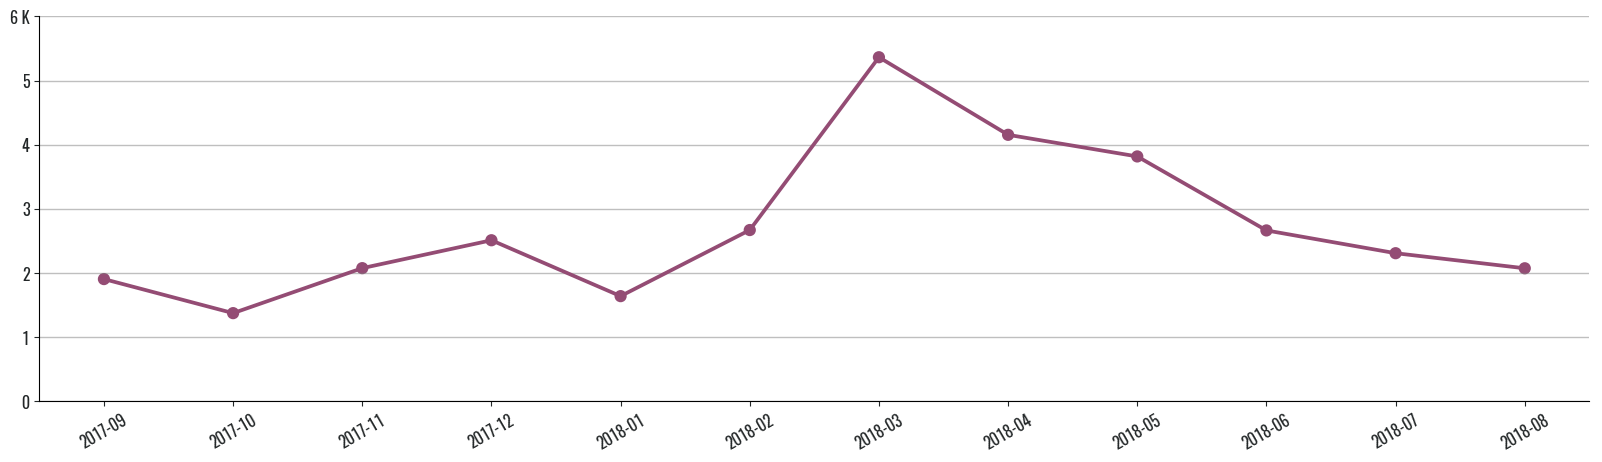

In [180]:
plt.figure(figsize=(20,5))

def with_words(value, pos):
    thousands = int(value / 1000)
    if thousands == 6:
        return "{} K".format(thousands)
    else: 
        return "{}".format(thousands)
    
formatter = FuncFormatter(with_words)


# ax = sns.pointplot(data=searches_buzz2, x='month',  y='topic', hue='channel',hue_order=['twitter', 'web','instagram','youtube','facebook'],pallete=['#61D3EE','#575757','#B5568A','#FF0000','#0070C0'])
ax = sns.pointplot(data=mnews_buzz1, x='month',  y='topic',color='#944C74')
# plt.setp(ax.collections, sizes=[1])
labels = ax.get_xticklabels() # get x labels


ax.yaxis.set_major_formatter(formatter)
ax.set_xticklabels(labels, rotation=30) # set new labels

plt.rcParams.update({
    'axes.grid':True,
   'grid.color':'grey',
   'grid.linewidth':1,
   'grid.alpha':0.5
})

ax.xaxis.label.set_visible(False)
ax.yaxis.label.set_visible(False)
ax.tick_params(left=True)
ax.set_ylim(0,6000)

plt.savefig("mnews_buzz_month.pdf")
plt.show()

In [132]:
mnews = df3[df3.topic == "Market News"]

In [133]:
mnews1 = mnews[['channel','sentiment']].copy()
mnews1.head()

,channel,sentiment
105,Twitter,neutral
150,Twitter,neutral
165,Twitter,neutral
170,Twitter,neutral
181,Twitter,neutral


In [134]:
mnews2 = mnews1.groupby('channel').sentiment.value_counts().unstack().reset_index().fillna(0)
mnews2

sentiment,channel,negative,neutral,positive
0,Blogs,5.0,357.0,0.0
1,Facebook,150.0,4415.0,7.0
2,Forums,1.0,13.0,0.0
3,Instagram,4.0,25.0,1.0
4,News,100.0,12966.0,16.0
5,Twitter,1022.0,13433.0,42.0
6,YouTube,8.0,18.0,0.0


In [135]:
mnews2['total'] = mnews2.sum(axis=1)
mnews2.sort_values(by='total',inplace=True)
mnews2

sentiment,channel,negative,neutral,positive,total
2,Forums,1.0,13.0,0.0,14.0
6,YouTube,8.0,18.0,0.0,26.0
3,Instagram,4.0,25.0,1.0,30.0
0,Blogs,5.0,357.0,0.0,362.0
1,Facebook,150.0,4415.0,7.0,4572.0
4,News,100.0,12966.0,16.0,13082.0
5,Twitter,1022.0,13433.0,42.0,14497.0


In [136]:
mnews3 = mnews2.copy()

In [137]:
mnews3['negative'] = round(mnews2.negative*100/mnews2.total,1)
mnews3['positive'] = round(mnews2.positive*100/mnews2.total,1)
mnews3['neutral'] = round(mnews2.neutral*100/mnews2.total,1)

In [138]:
mnews3

sentiment,channel,negative,neutral,positive,total
2,Forums,7.1,92.9,0.0,14.0
6,YouTube,30.8,69.2,0.0,26.0
3,Instagram,13.3,83.3,3.3,30.0
0,Blogs,1.4,98.6,0.0,362.0
1,Facebook,3.3,96.6,0.2,4572.0
4,News,0.8,99.1,0.1,13082.0
5,Twitter,7.0,92.7,0.3,14497.0


In [139]:
mnews3.drop(columns='total',inplace=True)
mnews3

sentiment,channel,negative,neutral,positive
2,Forums,7.1,92.9,0.0
6,YouTube,30.8,69.2,0.0
3,Instagram,13.3,83.3,3.3
0,Blogs,1.4,98.6,0.0
1,Facebook,3.3,96.6,0.2
4,News,0.8,99.1,0.1
5,Twitter,7.0,92.7,0.3


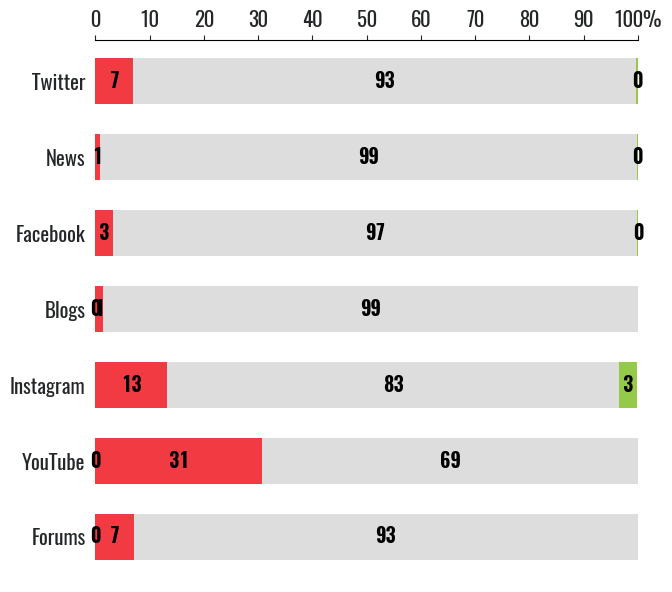

In [140]:
plt.rcParams.update({
    'axes.facecolor': 'white',
    'savefig.facecolor': 'white',
    'figure.facecolor': 'white',
    'axes.spines.left': False,
    'axes.spines.bottom': False,
    'axes.spines.top': True,
    'axes.spines.right': False,
    #'axes.grid':True
#   'grid.color':'#ffffff',
#   'grid.linewidth':2,
#    'grid.alpha':0.6,
    'xtick.top': True,
    'xtick.bottom': False,
    'xtick.color': '#232728',
    'ytick.color':'#232728',
    #'ytick.bottom': True,
    #'ytick.color': 'black'
    #'xtick.major.size': 7,
    #'xtick.major.width': 3,
    #'xtick.major.pad': 0,
    #'xtick.direction': 'in',
    'xtick.labelsize': 'small',
    'ytick.labelsize': 'small',
    'legend.loc': 'best',
     'legend.frameon': False,
     'legend.fontsize': 'small',
#      'legend.handlelength': 0.5,
#      'legend.handleheight': 0.5,
    #'legend.columnspacing': 2.0,
    'font.family': 'Oswald',
    'font.size':18,
    'text.color':'#232728',
     })

ax = mnews3.plot(kind='barh',stacked=True,x='channel',color=sent_colors,figsize=(7,7), width=0.6)

# for j in range(len(ax.patches)):
for i, patch in enumerate(ax.patches):
# print(i)
    bl = patch.get_xy()
    value= int(round(patch.get_width()))
    x_pos = 0.5*patch.get_width() + bl[0]
    y_pos = 0.5*patch.get_height() + bl[1]
    ax.text(x_pos,y_pos,value,va='center',ha='center',color='black',fontweight='bold',fontsize=14)

ax.xaxis.label.set_visible(False)
ax.yaxis.label.set_visible(False)
ax.tick_params(left=False)
ax.tick_params(bottom=False)
ax.set_xlim(0,100)

plt.tick_params(
      axis='x',          # changes apply to the x-axis
      which='major',      # both major and minor ticks are affected
      bottom=False,      # ticks along the bottom edge are off
      top=True,         # ticks along the top edge are off
      labelbottom=False,
      labeltop=True) # labels along the bottom edge are off

ax.set_xticks([0,10,20,30,40,50,60,70,80,90,100])
ax.set_xticklabels(['0','10','20','30','40','50','60','70','80','90','100%'])

ax.legend_.remove()

#ax.set_xticklabels([])

plt.savefig("mnews_sent.pdf")
# plt.savefig("topics_buzz_n.png")
plt.show()

In [141]:
mnews2.total.sum()

32583.0

In [142]:
mnews4 = mnews1[mnews1.sentiment != 'neutral']
mnews4.head(10)

,channel,sentiment
2478,Twitter,negative
2518,Twitter,negative
2521,Facebook,negative
2551,Twitter,negative
2552,Twitter,negative
2570,Twitter,negative
2571,Twitter,negative
2572,Twitter,negative
2573,Twitter,negative
2574,Twitter,negative


In [143]:
mnews4.sentiment.value_counts()

negative    1290
positive      66
Name: sentiment, dtype: int64

In [144]:
mnews4.sentiment.value_counts().sum()

1356

### Quitting

In [181]:
quitting_buzz = monthly[monthly.topic == "Quitting"]
quitting_buzz.head()

,month,topic,channel
43,2017-09,Quitting,Instagram
107,2017-09,Quitting,Twitter
141,2017-09,Quitting,Twitter
148,2017-09,Quitting,Twitter
155,2017-09,Quitting,Twitter


In [182]:
quitting_buzz1 = quitting_buzz.groupby('month').agg('count')
quitting_buzz1.sort_index(inplace=True)
quitting_buzz1 = quitting_buzz1.reset_index()

In [183]:
quitting_buzz1

,month,topic,channel
0,2017-09,3719,3719
1,2017-10,3053,3053
2,2017-11,3178,3178
3,2017-12,2764,2764
4,2018-01,4122,4122
5,2018-02,2713,2713
6,2018-03,4144,4144
7,2018-04,3069,3069
8,2018-05,3496,3496
9,2018-06,2859,2859


In [184]:
quitting_buzz1.sum()

month      2017-092017-102017-112017-122018-012018-022018...
topic                                                  37832
channel                                                37832
dtype: object

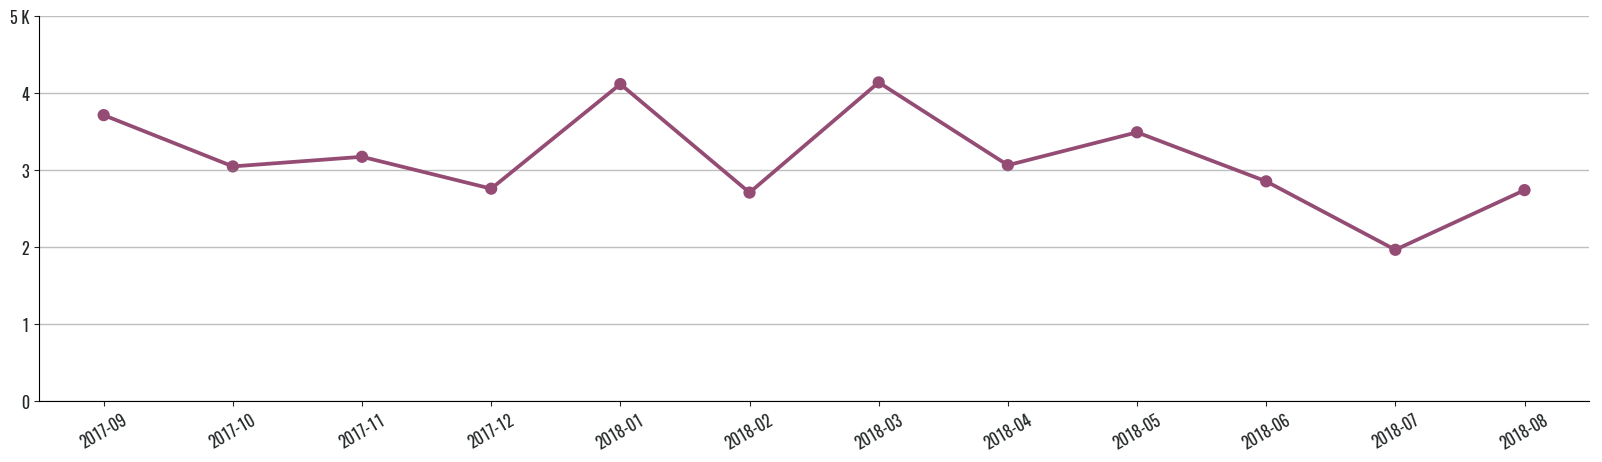

In [186]:
plt.figure(figsize=(20,5))

def with_words(value, pos):
    thousands = int(value / 1000)
    if thousands == 5:
        return "{} K".format(thousands)
    else: 
        return "{}".format(thousands)
    
formatter = FuncFormatter(with_words)


# ax = sns.pointplot(data=searches_buzz2, x='month',  y='topic', hue='channel',hue_order=['twitter', 'web','instagram','youtube','facebook'],pallete=['#61D3EE','#575757','#B5568A','#FF0000','#0070C0'])
ax = sns.pointplot(data=quitting_buzz1, x='month',  y='topic',color='#944C74')
# plt.setp(ax.collections, sizes=[1])
labels = ax.get_xticklabels() # get x labels


ax.yaxis.set_major_formatter(formatter)
ax.set_xticklabels(labels, rotation=30) # set new labels

plt.rcParams.update({
    'axes.grid':True,
   'grid.color':'grey',
   'grid.linewidth':1,
   'grid.alpha':0.5
})

ax.xaxis.label.set_visible(False)
ax.yaxis.label.set_visible(False)
ax.tick_params(left=True)
ax.set_ylim(0,5000)

plt.savefig("quitting_buzz_month.pdf")
plt.show()

In [145]:
giveup = df3[df3.topic == "Quitting"]

In [146]:
#df3.loc[df3.topic == 'Quitting']

In [147]:
giveup1 = giveup[['channel','sentiment']].copy()
giveup1.head()

,channel,sentiment
43,Instagram,neutral
107,Twitter,neutral
141,Twitter,neutral
148,Twitter,neutral
155,Twitter,neutral


In [148]:
giveup2 = giveup1.groupby('channel').sentiment.value_counts().unstack().reset_index().fillna(0)
giveup2

sentiment,channel,negative,neutral,positive
0,Blogs,1.0,17.0,6.0
1,Facebook,80.0,4361.0,252.0
2,Forums,1.0,7.0,0.0
3,Instagram,69.0,381.0,103.0
4,News,9.0,516.0,37.0
5,Twitter,10510.0,19076.0,2287.0
6,YouTube,18.0,47.0,54.0


In [149]:
giveup2['total'] = giveup2.sum(axis=1)
giveup2.sort_values(by='total',inplace=True)
giveup2

sentiment,channel,negative,neutral,positive,total
2,Forums,1.0,7.0,0.0,8.0
0,Blogs,1.0,17.0,6.0,24.0
6,YouTube,18.0,47.0,54.0,119.0
3,Instagram,69.0,381.0,103.0,553.0
4,News,9.0,516.0,37.0,562.0
1,Facebook,80.0,4361.0,252.0,4693.0
5,Twitter,10510.0,19076.0,2287.0,31873.0


In [150]:
giveup3 = giveup2.copy()

In [151]:
giveup3['negative'] = round(giveup2.negative*100/giveup2.total,1)
giveup3['positive'] = round(giveup2.positive*100/giveup2.total,1)
giveup3['neutral'] = round(giveup2.neutral*100/giveup2.total,1)

In [152]:
giveup3

sentiment,channel,negative,neutral,positive,total
2,Forums,12.5,87.5,0.0,8.0
0,Blogs,4.2,70.8,25.0,24.0
6,YouTube,15.1,39.5,45.4,119.0
3,Instagram,12.5,68.9,18.6,553.0
4,News,1.6,91.8,6.6,562.0
1,Facebook,1.7,92.9,5.4,4693.0
5,Twitter,33.0,59.9,7.2,31873.0


In [153]:
giveup3.drop(columns='total',inplace=True)
giveup3

sentiment,channel,negative,neutral,positive
2,Forums,12.5,87.5,0.0
0,Blogs,4.2,70.8,25.0
6,YouTube,15.1,39.5,45.4
3,Instagram,12.5,68.9,18.6
4,News,1.6,91.8,6.6
1,Facebook,1.7,92.9,5.4
5,Twitter,33.0,59.9,7.2


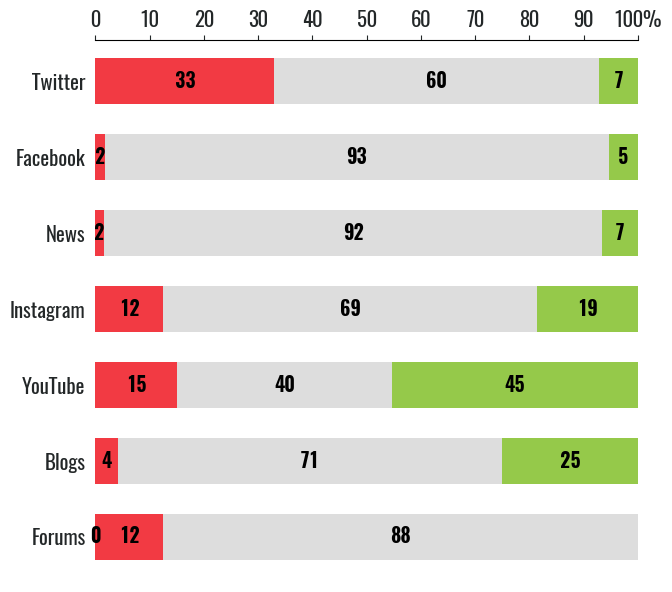

In [154]:
plt.rcParams.update({
    'axes.facecolor': 'white',
    'savefig.facecolor': 'white',
    'figure.facecolor': 'white',
    'axes.spines.left': False,
    'axes.spines.bottom': False,
    'axes.spines.top': True,
    'axes.spines.right': False,
    #'axes.grid':True
#   'grid.color':'#ffffff',
#   'grid.linewidth':2,
#    'grid.alpha':0.6,
    'xtick.top': True,
    'xtick.bottom': False,
    'xtick.color': '#232728',
    'ytick.color':'#232728',
    #'ytick.bottom': True,
    #'ytick.color': 'black'
    #'xtick.major.size': 7,
    #'xtick.major.width': 3,
    #'xtick.major.pad': 0,
    #'xtick.direction': 'in',
    'xtick.labelsize': 'small',
    'ytick.labelsize': 'small',
    'legend.loc': 'best',
     'legend.frameon': False,
     'legend.fontsize': 'small',
#      'legend.handlelength': 0.5,
#      'legend.handleheight': 0.5,
    #'legend.columnspacing': 2.0,
    'font.family': 'Oswald',
    'font.size':18,
    'text.color':'#232728',
     })

ax = giveup3.plot(kind='barh',stacked=True,x='channel',color=sent_colors,figsize=(7,7), width=0.6)

# for j in range(len(ax.patches)):
for i, patch in enumerate(ax.patches):
# print(i)
    bl = patch.get_xy()
    value= int(round(patch.get_width()))
    x_pos = 0.5*patch.get_width() + bl[0]
    y_pos = 0.5*patch.get_height() + bl[1]
    ax.text(x_pos,y_pos,value,va='center',ha='center',color='black',fontweight='bold',fontsize=14)

ax.xaxis.label.set_visible(False)
ax.yaxis.label.set_visible(False)
ax.tick_params(left=False)
ax.tick_params(bottom=False)
ax.set_xlim(0,100)

plt.tick_params(
      axis='x',          # changes apply to the x-axis
      which='major',      # both major and minor ticks are affected
      bottom=False,      # ticks along the bottom edge are off
      top=True,         # ticks along the top edge are off
      labelbottom=False,
      labeltop=True) # labels along the bottom edge are off

ax.set_xticks([0,10,20,30,40,50,60,70,80,90,100])
ax.set_xticklabels(['0','10','20','30','40','50','60','70','80','90','100%'])

ax.legend_.remove()

#ax.set_xticklabels([])

plt.savefig("giveup_sent.pdf")
# plt.savefig("topics_buzz_n.png")
plt.show()

In [155]:
giveup2.total.sum()

37832.0

In [156]:
giveup4 = giveup1[giveup1.sentiment != 'neutral']
giveup4.head(10)

,channel,sentiment
2453,Twitter,negative
2454,Twitter,negative
2473,Twitter,negative
2474,Twitter,negative
2476,Twitter,negative
2497,Twitter,negative
2498,Twitter,negative
2499,Twitter,negative
2500,Twitter,negative
2501,Twitter,negative


In [157]:
giveup4.sentiment.value_counts()

negative    10688
positive     2739
Name: sentiment, dtype: int64

In [158]:
giveup4.sentiment.value_counts().sum()

13427

### Reduced Risk Products

In [213]:
rrp_buzz = monthly[monthly.topic == "Reduced Risk Products"]
rrp_buzz.head()

,month,topic,channel
100,2017-09,Reduced Risk Products,Twitter
106,2017-09,Reduced Risk Products,Twitter
162,2017-09,Reduced Risk Products,Twitter
173,2017-09,Reduced Risk Products,Twitter
174,2017-09,Reduced Risk Products,Twitter


In [214]:
rrp_buzz1 = rrp_buzz.groupby('month').agg('count')
rrp_buzz1.sort_index(inplace=True)
rrp_buzz1 = rrp_buzz1.reset_index()

In [215]:
rrp_buzz1

,month,topic,channel
0,2017-09,2454,2454
1,2017-10,2995,2995
2,2017-11,3126,3126
3,2017-12,1915,1915
4,2018-01,3441,3441
5,2018-02,2105,2105
6,2018-03,3217,3217
7,2018-04,2069,2069
8,2018-05,2241,2241
9,2018-06,1856,1856


In [216]:
rrp_buzz1.sum()

month      2017-092017-102017-112017-122018-012018-022018...
topic                                                  29898
channel                                                29898
dtype: object

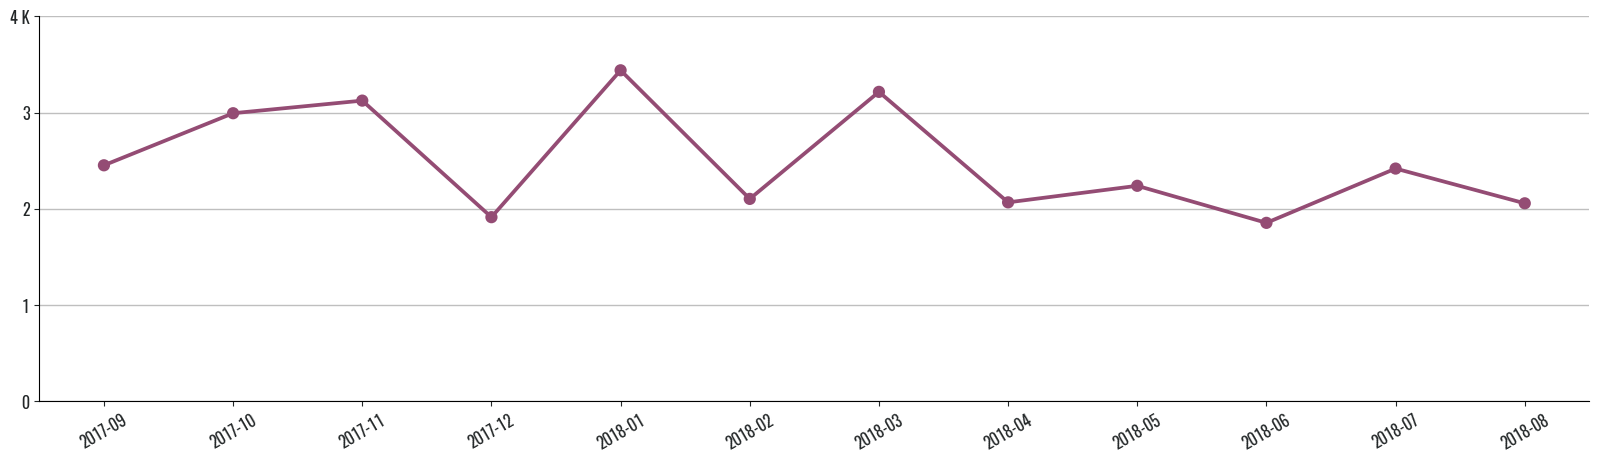

In [220]:
plt.figure(figsize=(20,5))

# def with_words(value, pos):
#     thousands = int(value / 1000)
#     if thousands == 4:
#         return "{} K".format(thousands)
#     else: 
#         return "{}".format(thousands)
    
# formatter = FuncFormatter(with_words)


# ax = sns.pointplot(data=searches_buzz2, x='month',  y='topic', hue='channel',hue_order=['twitter', 'web','instagram','youtube','facebook'],pallete=['#61D3EE','#575757','#B5568A','#FF0000','#0070C0'])
ax = sns.pointplot(data=rrp_buzz1, x='month',  y='topic',color='#944C74')
# plt.setp(ax.collections, sizes=[1])
labels = ax.get_xticklabels() # get x labels


ax.yaxis.set_major_formatter(formatter)
ax.set_xticklabels(labels, rotation=30) # set new labels

plt.rcParams.update({
    'axes.grid':True,
   'grid.color':'grey',
   'grid.linewidth':1,
   'grid.alpha':0.5
})

ax.xaxis.label.set_visible(False)
ax.yaxis.label.set_visible(False)
ax.tick_params(left=True)
# ax.set_ylim(0,4000)

ax.set_yticks([0,1000,2000,3000,4000])
ax.set_yticklabels(['0','1','2','3','4 K'])


plt.savefig("rrp_buzz_month.pdf")
plt.show()

In [159]:
rrp = df3[df3.topic == "Reduced Risk Products"]

In [160]:
rrp1 = rrp[['channel','sentiment']].copy()
rrp1.head()

,channel,sentiment
100,Twitter,neutral
106,Twitter,neutral
162,Twitter,neutral
173,Twitter,neutral
174,Twitter,neutral


In [161]:
rrp2 = rrp1.groupby('channel').sentiment.value_counts().unstack().reset_index().fillna(0)
rrp2

sentiment,channel,negative,neutral,positive
0,Blogs,5.0,25.0,0.0
1,Facebook,331.0,9401.0,115.0
2,Forums,8.0,231.0,7.0
3,Instagram,7.0,1135.0,36.0
4,News,134.0,390.0,29.0
5,Twitter,3343.0,14024.0,76.0
6,YouTube,26.0,528.0,47.0


In [162]:
rrp2['total'] = rrp2.sum(axis=1)
rrp2.sort_values(by='total',inplace=True)
rrp2

sentiment,channel,negative,neutral,positive,total
0,Blogs,5.0,25.0,0.0,30.0
2,Forums,8.0,231.0,7.0,246.0
4,News,134.0,390.0,29.0,553.0
6,YouTube,26.0,528.0,47.0,601.0
3,Instagram,7.0,1135.0,36.0,1178.0
1,Facebook,331.0,9401.0,115.0,9847.0
5,Twitter,3343.0,14024.0,76.0,17443.0


In [163]:
rrp3 = rrp2.copy()

In [164]:
rrp3['negative'] = round(rrp2.negative*100/rrp2.total,1)
rrp3['positive'] = round(rrp2.positive*100/rrp2.total,1)
rrp3['neutral'] = round(rrp2.neutral*100/rrp2.total,1)

In [165]:
rrp3

sentiment,channel,negative,neutral,positive,total
0,Blogs,16.7,83.3,0.0,30.0
2,Forums,3.3,93.9,2.8,246.0
4,News,24.2,70.5,5.2,553.0
6,YouTube,4.3,87.9,7.8,601.0
3,Instagram,0.6,96.3,3.1,1178.0
1,Facebook,3.4,95.5,1.2,9847.0
5,Twitter,19.2,80.4,0.4,17443.0


In [166]:
rrp3.drop(columns='total',inplace=True)
rrp3

sentiment,channel,negative,neutral,positive
0,Blogs,16.7,83.3,0.0
2,Forums,3.3,93.9,2.8
4,News,24.2,70.5,5.2
6,YouTube,4.3,87.9,7.8
3,Instagram,0.6,96.3,3.1
1,Facebook,3.4,95.5,1.2
5,Twitter,19.2,80.4,0.4


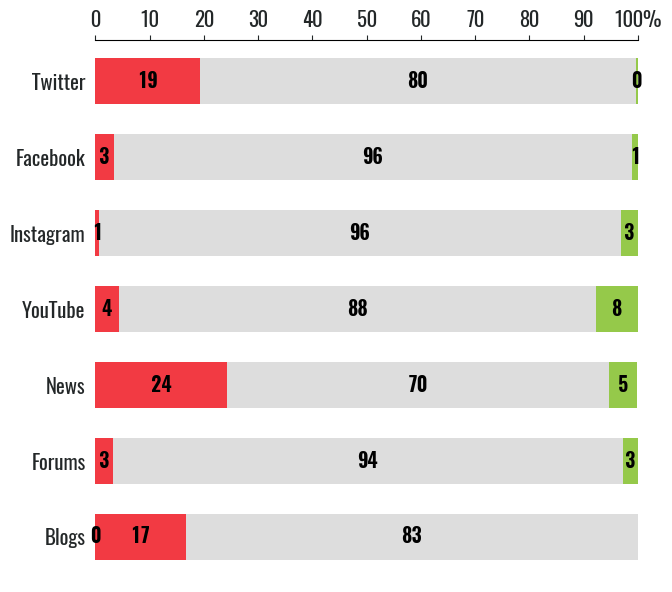

In [167]:
plt.rcParams.update({
    'axes.facecolor': 'white',
    'savefig.facecolor': 'white',
    'figure.facecolor': 'white',
    'axes.spines.left': False,
    'axes.spines.bottom': False,
    'axes.spines.top': True,
    'axes.spines.right': False,
    #'axes.grid':True
#   'grid.color':'#ffffff',
#   'grid.linewidth':2,
#    'grid.alpha':0.6,
    'xtick.top': True,
    'xtick.bottom': False,
    'xtick.color': '#232728',
    'ytick.color':'#232728',
    #'ytick.bottom': True,
    #'ytick.color': 'black'
    #'xtick.major.size': 7,
    #'xtick.major.width': 3,
    #'xtick.major.pad': 0,
    #'xtick.direction': 'in',
    'xtick.labelsize': 'small',
    'ytick.labelsize': 'small',
    'legend.loc': 'best',
     'legend.frameon': False,
     'legend.fontsize': 'small',
#      'legend.handlelength': 0.5,
#      'legend.handleheight': 0.5,
    #'legend.columnspacing': 2.0,
    'font.family': 'Oswald',
    'font.size':18,
    'text.color':'#232728',
     })

ax = rrp3.plot(kind='barh',stacked=True,x='channel',color=sent_colors,figsize=(7,7), width=0.6)

# for j in range(len(ax.patches)):
for i, patch in enumerate(ax.patches):
# print(i)
    bl = patch.get_xy()
    value= int(round(patch.get_width()))
    x_pos = 0.5*patch.get_width() + bl[0]
    y_pos = 0.5*patch.get_height() + bl[1]
    ax.text(x_pos,y_pos,value,va='center',ha='center',color='black',fontweight='bold',fontsize=14)

ax.xaxis.label.set_visible(False)
ax.yaxis.label.set_visible(False)
ax.tick_params(left=False)
ax.tick_params(bottom=False)
ax.set_xlim(0,100)

plt.tick_params(
      axis='x',          # changes apply to the x-axis
      which='major',      # both major and minor ticks are affected
      bottom=False,      # ticks along the bottom edge are off
      top=True,         # ticks along the top edge are off
      labelbottom=False,
      labeltop=True) # labels along the bottom edge are off

ax.set_xticks([0,10,20,30,40,50,60,70,80,90,100])
ax.set_xticklabels(['0','10','20','30','40','50','60','70','80','90','100%'])

ax.legend_.remove()

#ax.set_xticklabels([])

plt.savefig("rrp_sent.pdf")
# plt.savefig("topics_buzz_n.png")
plt.show()

In [168]:
rrp2.total.sum()

29898.0

In [169]:
rrp4 = rrp1[rrp1.sentiment != 'neutral']
rrp4.head(10)

,channel,sentiment
2212,Twitter,negative
2213,Twitter,negative
2214,Twitter,negative
2253,Twitter,negative
2257,Facebook,positive
2260,Facebook,negative
2261,Twitter,negative
2262,Twitter,negative
2382,Twitter,negative
2383,Twitter,negative


In [170]:
rrp4.sentiment.value_counts()

negative    3854
positive     310
Name: sentiment, dtype: int64

In [171]:
rrp4.sentiment.value_counts().sum()

4164

### Environment

In [187]:
env_buzz = monthly[monthly.topic == "Environment"]
env_buzz.head()

,month,topic,channel
110,2017-09,Environment,Twitter
121,2017-09,Environment,Twitter
199,2017-09,Environment,Twitter
323,2017-09,Environment,Twitter
367,2017-09,Environment,Twitter


In [188]:
env_buzz1 = env_buzz.groupby('month').agg('count')
env_buzz1.sort_index(inplace=True)
env_buzz1 = env_buzz1.reset_index()

In [189]:
env_buzz1

,month,topic,channel
0,2017-09,384,384
1,2017-10,208,208
2,2017-11,199,199
3,2017-12,30,30
4,2018-01,59,59
5,2018-02,258,258
6,2018-03,218,218
7,2018-04,185,185
8,2018-05,176,176
9,2018-06,181,181


In [190]:
env_buzz1.sum()

month      2017-092017-102017-112017-122018-012018-022018...
topic                                                   7458
channel                                                 7458
dtype: object

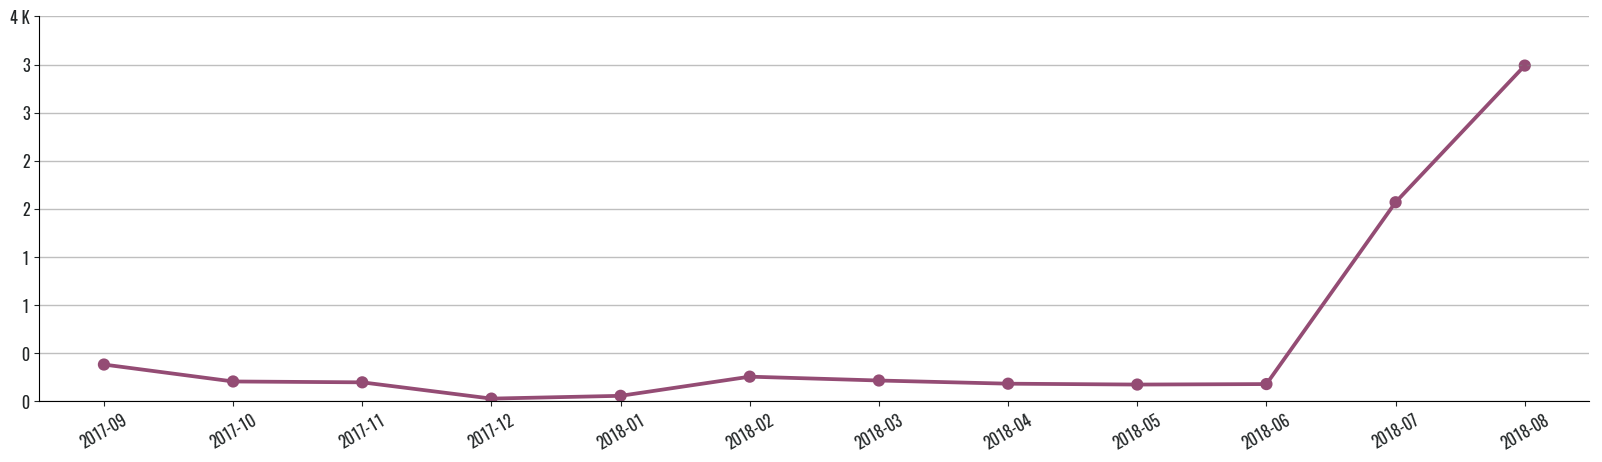

In [192]:
plt.figure(figsize=(20,5))

def with_words(value, pos):
    thousands = int(value / 1000)
    if thousands == 4:
        return "{} K".format(thousands)
    else: 
        return "{}".format(thousands)
    
formatter = FuncFormatter(with_words)


# ax = sns.pointplot(data=searches_buzz2, x='month',  y='topic', hue='channel',hue_order=['twitter', 'web','instagram','youtube','facebook'],pallete=['#61D3EE','#575757','#B5568A','#FF0000','#0070C0'])
ax = sns.pointplot(data=env_buzz1, x='month',  y='topic',color='#944C74')
# plt.setp(ax.collections, sizes=[1])
labels = ax.get_xticklabels() # get x labels


ax.yaxis.set_major_formatter(formatter)
ax.set_xticklabels(labels, rotation=30) # set new labels

plt.rcParams.update({
    'axes.grid':True,
   'grid.color':'grey',
   'grid.linewidth':1,
   'grid.alpha':0.5
})

ax.xaxis.label.set_visible(False)
ax.yaxis.label.set_visible(False)
ax.tick_params(left=True)
ax.set_ylim(0,4000)

plt.savefig("env_buzz_month.pdf")
plt.show()

In [172]:
env = df3[df3.topic == "Environment"]

In [173]:
env1 = env[['channel','sentiment']].copy()
env1.head()

,channel,sentiment
110,Twitter,neutral
121,Twitter,neutral
199,Twitter,neutral
323,Twitter,neutral
367,Twitter,neutral


In [174]:
env2 = env1.groupby('channel').sentiment.value_counts().unstack().reset_index().fillna(0)
env2

sentiment,channel,negative,neutral,positive
0,Blogs,7.0,224.0,1.0
1,Facebook,133.0,359.0,7.0
2,Instagram,8.0,12.0,0.0
3,News,156.0,4371.0,0.0
4,Twitter,981.0,1188.0,2.0
5,YouTube,3.0,6.0,0.0


In [175]:
env2['total'] = env2.sum(axis=1)
env2.sort_values(by='total',inplace=True)
env2

sentiment,channel,negative,neutral,positive,total
5,YouTube,3.0,6.0,0.0,9.0
2,Instagram,8.0,12.0,0.0,20.0
0,Blogs,7.0,224.0,1.0,232.0
1,Facebook,133.0,359.0,7.0,499.0
4,Twitter,981.0,1188.0,2.0,2171.0
3,News,156.0,4371.0,0.0,4527.0


In [176]:
env3 = env2.copy()

In [177]:
env3['negative'] = round(env2.negative*100/env2.total,1)
env3['positive'] = round(env2.positive*100/env2.total,1)
env3['neutral'] = round(env2.neutral*100/env2.total,1)

In [178]:
env3

sentiment,channel,negative,neutral,positive,total
5,YouTube,33.3,66.7,0.0,9.0
2,Instagram,40.0,60.0,0.0,20.0
0,Blogs,3.0,96.6,0.4,232.0
1,Facebook,26.7,71.9,1.4,499.0
4,Twitter,45.2,54.7,0.1,2171.0
3,News,3.4,96.6,0.0,4527.0


In [179]:
env3.drop(columns='total',inplace=True)
env3

sentiment,channel,negative,neutral,positive
5,YouTube,33.3,66.7,0.0
2,Instagram,40.0,60.0,0.0
0,Blogs,3.0,96.6,0.4
1,Facebook,26.7,71.9,1.4
4,Twitter,45.2,54.7,0.1
3,News,3.4,96.6,0.0


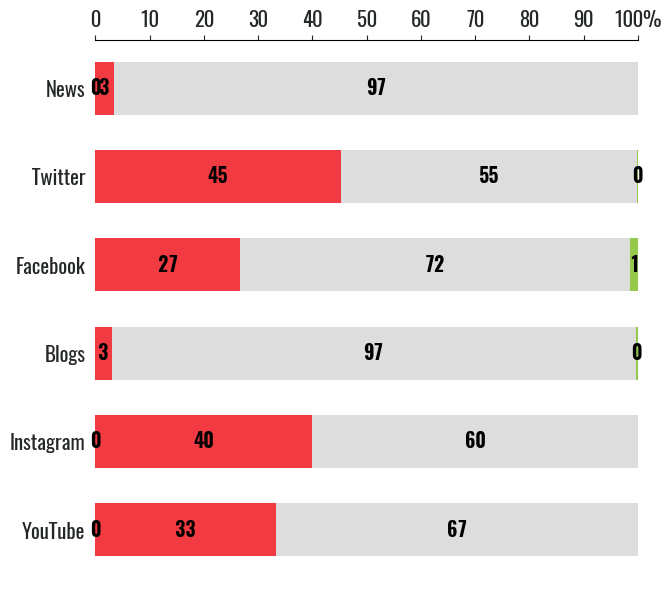

In [180]:
plt.rcParams.update({
    'axes.facecolor': 'white',
    'savefig.facecolor': 'white',
    'figure.facecolor': 'white',
    'axes.spines.left': False,
    'axes.spines.bottom': False,
    'axes.spines.top': True,
    'axes.spines.right': False,
    #'axes.grid':True
#   'grid.color':'#ffffff',
#   'grid.linewidth':2,
#    'grid.alpha':0.6,
    'xtick.top': True,
    'xtick.bottom': False,
    'xtick.color': '#232728',
    'ytick.color':'#232728',
    #'ytick.bottom': True,
    #'ytick.color': 'black'
    #'xtick.major.size': 7,
    #'xtick.major.width': 3,
    #'xtick.major.pad': 0,
    #'xtick.direction': 'in',
    'xtick.labelsize': 'small',
    'ytick.labelsize': 'small',
    'legend.loc': 'best',
     'legend.frameon': False,
     'legend.fontsize': 'small',
#      'legend.handlelength': 0.5,
#      'legend.handleheight': 0.5,
    #'legend.columnspacing': 2.0,
    'font.family': 'Oswald',
    'font.size':18,
    'text.color':'#232728',
     })

ax = env3.plot(kind='barh',stacked=True,x='channel',color=sent_colors,figsize=(7,7), width=0.6)

# for j in range(len(ax.patches)):
for i, patch in enumerate(ax.patches):
# print(i)
    bl = patch.get_xy()
    value= int(round(patch.get_width()))
    x_pos = 0.5*patch.get_width() + bl[0]
    y_pos = 0.5*patch.get_height() + bl[1]
    ax.text(x_pos,y_pos,value,va='center',ha='center',color='black',fontweight='bold',fontsize=14)

ax.xaxis.label.set_visible(False)
ax.yaxis.label.set_visible(False)
ax.tick_params(left=False)
ax.tick_params(bottom=False)
ax.set_xlim(0,100)

plt.tick_params(
      axis='x',          # changes apply to the x-axis
      which='major',      # both major and minor ticks are affected
      bottom=False,      # ticks along the bottom edge are off
      top=True,         # ticks along the top edge are off
      labelbottom=False,
      labeltop=True) # labels along the bottom edge are off

ax.set_xticks([0,10,20,30,40,50,60,70,80,90,100])
ax.set_xticklabels(['0','10','20','30','40','50','60','70','80','90','100%'])

ax.legend_.remove()

#ax.set_xticklabels([])

plt.savefig("env_sent.pdf")
# plt.savefig("topics_buzz_n.png")
plt.show()

In [181]:
env2.total.sum()

7458.0

In [182]:
env4 = env1[env1.sentiment != 'neutral']
env4.head(10)

,channel,sentiment
2488,Twitter,negative
2489,Twitter,negative
2603,Twitter,negative
2604,Twitter,negative
2605,Twitter,negative
2606,Twitter,negative
2607,Twitter,negative
2608,Twitter,negative
2609,Twitter,negative
2625,Twitter,negative


In [183]:
env4.sentiment.value_counts()

negative    1288
positive      10
Name: sentiment, dtype: int64

In [184]:
env4.sentiment.value_counts().sum()

1298

### Marijuana

In [200]:
marijuana_buzz = monthly[monthly.topic == "Marijuana"]
marijuana_buzz.head()

,month,topic,channel
175,2017-09,Marijuana,Twitter
375,2017-09,Marijuana,Twitter
526,2017-09,Marijuana,Twitter
538,2017-09,Marijuana,Twitter
593,2017-09,Marijuana,Twitter


In [201]:
marijuana_buzz1 = marijuana_buzz.groupby('month').agg('count')
marijuana_buzz1.sort_index(inplace=True)
marijuana_buzz1 = marijuana_buzz1.reset_index()

In [202]:
marijuana_buzz1

,month,topic,channel
0,2017-09,586,586
1,2017-10,1100,1100
2,2017-11,943,943
3,2017-12,579,579
4,2018-01,677,677
5,2018-02,1177,1177
6,2018-03,991,991
7,2018-04,1457,1457
8,2018-05,1604,1604
9,2018-06,1103,1103


In [203]:
marijuana_buzz1.sum()

month      2017-092017-102017-112017-122018-012018-022018...
topic                                                  11655
channel                                                11655
dtype: object

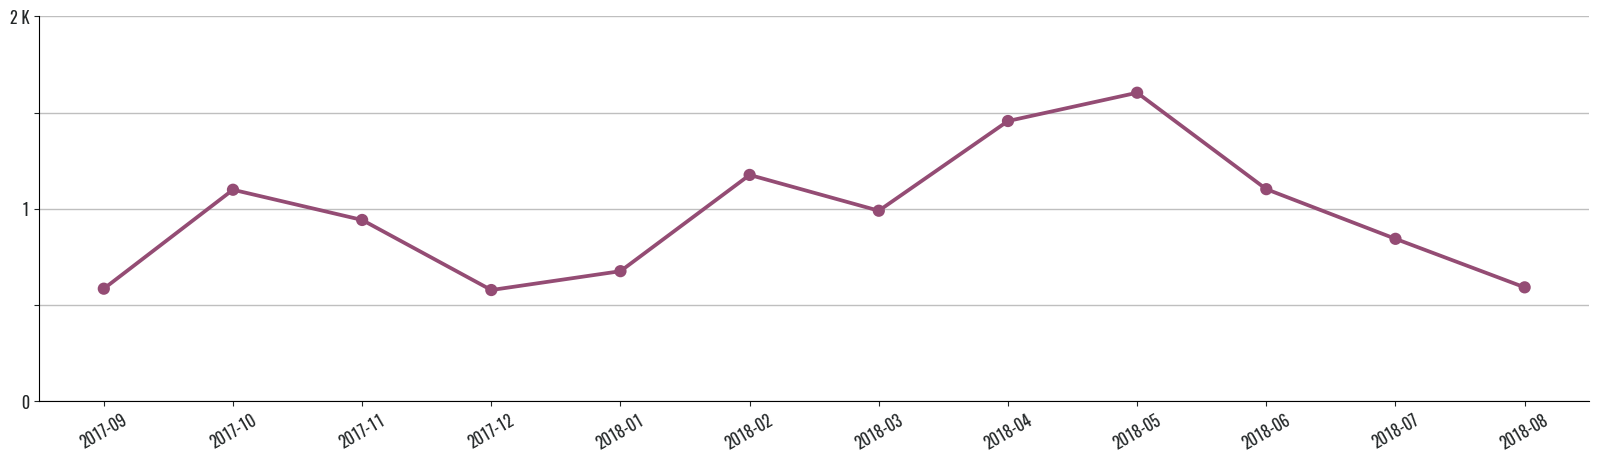

In [212]:
plt.figure(figsize=(20,5))

# def with_words(value, pos):
#     thousands = int(value / 1000)
#     if thousands == 2:
#         return "{} K".format(thousands)
#     else: 
#         return "{}".format(thousands)
    
# formatter = FuncFormatter(with_words)


# ax = sns.pointplot(data=searches_buzz2, x='month',  y='topic', hue='channel',hue_order=['twitter', 'web','instagram','youtube','facebook'],pallete=['#61D3EE','#575757','#B5568A','#FF0000','#0070C0'])
ax = sns.pointplot(data=marijuana_buzz1, x='month',  y='topic',color='#944C74')
# plt.setp(ax.collections, sizes=[1])
labels = ax.get_xticklabels() # get x labels


ax.yaxis.set_major_formatter(formatter)
ax.set_xticklabels(labels, rotation=30) # set new labels

plt.rcParams.update({
    'axes.grid':True,
   'grid.color':'grey',
   'grid.linewidth':1,
   'grid.alpha':0.5
})

ax.xaxis.label.set_visible(False)
ax.yaxis.label.set_visible(False)
ax.tick_params(left=True)
# ax.set_ylim(0,2000)

ax.set_yticks([0,500,1000,1500,2000])
ax.set_yticklabels(['0','','1','','2 K'])

plt.savefig("marijuana_buzz_month.pdf")
plt.show()

In [185]:
marijuana = df3[df3.topic == "Marijuana"]

In [186]:
marijuana1 = marijuana[['channel','sentiment']].copy()
marijuana1.head()

,channel,sentiment
175,Twitter,neutral
375,Twitter,neutral
526,Twitter,neutral
538,Twitter,neutral
593,Twitter,neutral


In [187]:
marijuana2 = marijuana1.groupby('channel').sentiment.value_counts().unstack().reset_index().fillna(0)
marijuana2

sentiment,channel,negative,neutral,positive
0,Blogs,1.0,31.0,2.0
1,Facebook,82.0,1692.0,100.0
2,Instagram,10.0,140.0,3.0
3,News,51.0,572.0,13.0
4,Twitter,860.0,8029.0,13.0
5,YouTube,17.0,39.0,0.0


In [188]:
marijuana2['total'] = marijuana2.sum(axis=1)
marijuana2.sort_values(by='total',inplace=True)
marijuana2

sentiment,channel,negative,neutral,positive,total
0,Blogs,1.0,31.0,2.0,34.0
5,YouTube,17.0,39.0,0.0,56.0
2,Instagram,10.0,140.0,3.0,153.0
3,News,51.0,572.0,13.0,636.0
1,Facebook,82.0,1692.0,100.0,1874.0
4,Twitter,860.0,8029.0,13.0,8902.0


In [189]:
marijuana3 = marijuana2.copy()

In [190]:
marijuana3['negative'] = round(marijuana2.negative*100/marijuana2.total,1)
marijuana3['positive'] = round(marijuana2.positive*100/marijuana2.total,1)
marijuana3['neutral'] = round(marijuana2.neutral*100/marijuana2.total,1)

In [191]:
marijuana3

sentiment,channel,negative,neutral,positive,total
0,Blogs,2.9,91.2,5.9,34.0
5,YouTube,30.4,69.6,0.0,56.0
2,Instagram,6.5,91.5,2.0,153.0
3,News,8.0,89.9,2.0,636.0
1,Facebook,4.4,90.3,5.3,1874.0
4,Twitter,9.7,90.2,0.1,8902.0


In [192]:
marijuana3.drop(columns='total',inplace=True)
marijuana3

sentiment,channel,negative,neutral,positive
0,Blogs,2.9,91.2,5.9
5,YouTube,30.4,69.6,0.0
2,Instagram,6.5,91.5,2.0
3,News,8.0,89.9,2.0
1,Facebook,4.4,90.3,5.3
4,Twitter,9.7,90.2,0.1


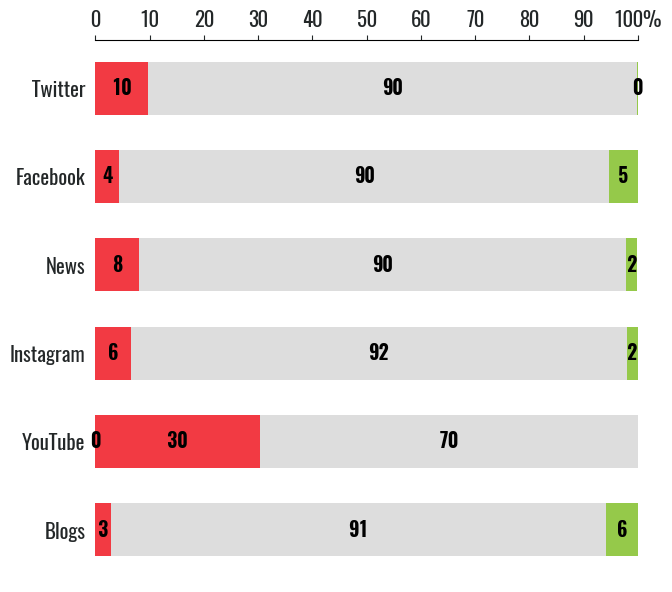

In [193]:
plt.rcParams.update({
    'axes.facecolor': 'white',
    'savefig.facecolor': 'white',
    'figure.facecolor': 'white',
    'axes.spines.left': False,
    'axes.spines.bottom': False,
    'axes.spines.top': True,
    'axes.spines.right': False,
    #'axes.grid':True
#   'grid.color':'#ffffff',
#   'grid.linewidth':2,
#    'grid.alpha':0.6,
    'xtick.top': True,
    'xtick.bottom': False,
    'xtick.color': '#232728',
    'ytick.color':'#232728',
    #'ytick.bottom': True,
    #'ytick.color': 'black'
    #'xtick.major.size': 7,
    #'xtick.major.width': 3,
    #'xtick.major.pad': 0,
    #'xtick.direction': 'in',
    'xtick.labelsize': 'small',
    'ytick.labelsize': 'small',
    'legend.loc': 'best',
     'legend.frameon': False,
     'legend.fontsize': 'small',
#      'legend.handlelength': 0.5,
#      'legend.handleheight': 0.5,
    #'legend.columnspacing': 2.0,
    'font.family': 'Oswald',
    'font.size':18,
    'text.color':'#232728',
     })

ax = marijuana3.plot(kind='barh',stacked=True,x='channel',color=sent_colors,figsize=(7,7), width=0.6)

# for j in range(len(ax.patches)):
for i, patch in enumerate(ax.patches):
# print(i)
    bl = patch.get_xy()
    value= int(round(patch.get_width()))
    x_pos = 0.5*patch.get_width() + bl[0]
    y_pos = 0.5*patch.get_height() + bl[1]
    ax.text(x_pos,y_pos,value,va='center',ha='center',color='black',fontweight='bold',fontsize=14)

ax.xaxis.label.set_visible(False)
ax.yaxis.label.set_visible(False)
ax.tick_params(left=False)
ax.tick_params(bottom=False)
ax.set_xlim(0,100)

plt.tick_params(
      axis='x',          # changes apply to the x-axis
      which='major',      # both major and minor ticks are affected
      bottom=False,      # ticks along the bottom edge are off
      top=True,         # ticks along the top edge are off
      labelbottom=False,
      labeltop=True) # labels along the bottom edge are off

ax.set_xticks([0,10,20,30,40,50,60,70,80,90,100])
ax.set_xticklabels(['0','10','20','30','40','50','60','70','80','90','100%'])

ax.legend_.remove()

#ax.set_xticklabels([])

plt.savefig("marijuana_sent.pdf")
# plt.savefig("topics_buzz_n.png")
plt.show()

In [194]:
marijuana2.total.sum()

11655.0

In [195]:
marijuana4 = marijuana1[marijuana1.sentiment != 'neutral']
marijuana4.head(10)

,channel,sentiment
2594,Twitter,negative
5173,Twitter,positive
7298,Twitter,negative
7299,Twitter,negative
7300,Twitter,negative
7301,Twitter,negative
7302,Twitter,negative
7303,Twitter,negative
7304,Twitter,negative
7305,Twitter,negative


In [196]:
marijuana4.sentiment.value_counts()

negative    1021
positive     131
Name: sentiment, dtype: int64

In [197]:
marijuana4.sentiment.value_counts().sum()

1152

### Supplement by channel chart

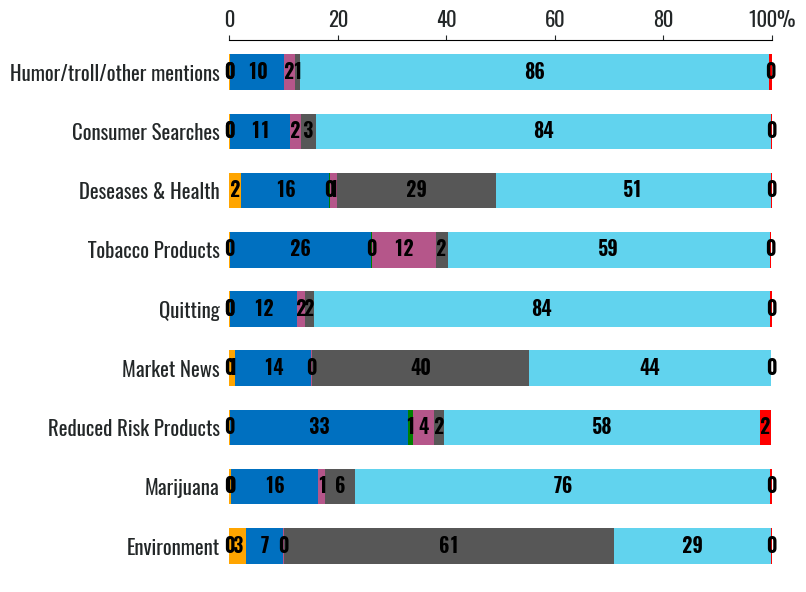

In [199]:
plt.rcParams.update({
    'axes.facecolor': 'white',
    'savefig.facecolor': 'white',
    'figure.facecolor': 'white',
    'axes.spines.left': False,
    'axes.spines.bottom': False,
    'axes.spines.top': True,
    'axes.spines.right': False,
    #'axes.grid':True
#   'grid.color':'#ffffff',
#   'grid.linewidth':2,
#    'grid.alpha':0.6,
    'xtick.top': True,
    'xtick.bottom': False,
    'xtick.color': '#232728',
    'ytick.color':'#232728',
    #'ytick.bottom': True,
    #'ytick.color': 'black'
    #'xtick.major.size': 7,
    #'xtick.major.width': 3,
    #'xtick.major.pad': 0,
    #'xtick.direction': 'in',
    'xtick.labelsize': 'small',
    'ytick.labelsize': 'small',
    'legend.loc': 'best',
     'legend.frameon': False,
     'legend.fontsize': 'small',
#      'legend.handlelength': 0.5,
#      'legend.handleheight': 0.5,
    #'legend.columnspacing': 2.0,
    'font.family': 'Oswald',
    'font.size':18,
    'text.color':'#232728',
     })


ax = df6.plot(kind='barh',stacked=True,x='topic',color=bar_colors,figsize=(7,7), width=0.6)

for i, patch in enumerate(ax.patches):
# print(i)
    bl = patch.get_xy()
    value= int(round(patch.get_width()))
    x_pos = 0.5*patch.get_width() + bl[0]
    y_pos = 0.5*patch.get_height() + bl[1]
    ax.text(x_pos,y_pos,value,va='center',ha='center',color='black',fontweight='bold',fontsize=14)

ax.xaxis.label.set_visible(False)
ax.yaxis.label.set_visible(False)
ax.tick_params(left=False)
ax.tick_params(bottom=False)
ax.set_xlim(0,100)

plt.tick_params(
      axis='x',          # changes apply to the x-axis
      which='major',      # both major and minor ticks are affected
      bottom=False,      # ticks along the bottom edge are off
      top=True,         # ticks along the top edge are off
      labelbottom=False,
      labeltop=True) # labels along the bottom edge are off

ax.set_xticks([0,20,40,60,80,100])
ax.set_xticklabels(['0','20','40','60','80','100%'])

ax.legend_.remove()
#ax.set_xticklabels([])

plt.savefig("channel_topic_pct2.pdf")
# plt.savefig("topics_buzz_n.png")
plt.show()